In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

# Configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)



# EDA (Exploratory Data Analysis)

### CHARGEMENT DES DONNÉES

In [130]:
print("\n" + "="*100)
print("CHARGEMENT DES DONNÉES")
print("="*100)
df=pd.read_csv('/content/Phenotypic_V1_0b_preprocessed1.xls')
print(f"\n Dimensions: {df.shape}")
print(f"\n{df.head()}")


CHARGEMENT DES DONNÉES

 Dimensions: (1112, 106)

   Unnamed: 0.1  Unnamed: 0  SUB_ID  X  subject SITE_ID       FILE_ID  \
0             0           1   50002  1    50002    PITT   no_filename   
1             1           2   50003  2    50003    PITT  Pitt_0050003   
2             2           3   50004  3    50004    PITT  Pitt_0050004   
3             3           4   50005  4    50005    PITT  Pitt_0050005   
4             4           5   50006  5    50006    PITT  Pitt_0050006   

   DX_GROUP  DSM_IV_TR  AGE_AT_SCAN  SEX HANDEDNESS_CATEGORY  \
0         1          1        16.77    1                Ambi   
1         1          1        24.45    1                   R   
2         1          1        19.09    1                   R   
3         1          1        13.73    2                   R   
4         1          1        13.37    1                   L   

   HANDEDNESS_SCORES    FIQ    VIQ    PIQ FIQ_TEST_TYPE VIQ_TEST_TYPE  \
0                NaN  103.0  116.0   89.0          W

### I.1 - STATISTIQUES DESCRIPTIVES GÉNÉRALES

In [131]:
print("\n" + "="*100)
print("I.1 - STATISTIQUES DESCRIPTIVES GÉNÉRALES")
print("="*100)

print("\n Informations sur le dataset:")
print(df.info())

print("\n Statistiques descriptives (variables numériques):")
stats_desc = df.describe().T
stats_desc['missing'] = df.isnull().sum()
stats_desc['missing_pct'] = (df.isnull().sum() / len(df)) * 100
print(stats_desc[['count', 'mean', 'std', 'min', '50%', 'max', 'missing', 'missing_pct']].head(20))
# Variables clés
print("\n DISTRIBUTION DES VARIABLES CLÉS:")
print(f"\nDX_GROUP (Groupe diagnostic):")
print(df['DX_GROUP'].value_counts())
print(f"\nSEX (Sexe):")
print(df['SEX'].value_counts())
print(f"\nSITE_ID (Sites de collecte):")
print(df['SITE_ID'].value_counts())
print(f"\nSUB_IN_SMP (Variable cible - Sujet dans échantillon):")
print(df['SUB_IN_SMP'].value_counts())
print(f"  Proportion: {df['SUB_IN_SMP'].value_counts(normalize=True)}")


I.1 - STATISTIQUES DESCRIPTIVES GÉNÉRALES

 Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Columns: 106 entries, Unnamed: 0.1 to SUB_IN_SMP
dtypes: float64(77), int64(10), object(19)
memory usage: 921.0+ KB
None

 Statistiques descriptives (variables numériques):
                        count          mean          std       min       50%  \
Unnamed: 0.1           1112.0    555.500000   321.151055      0.00    555.50   
Unnamed: 0             1112.0    556.500000   321.151055      1.00    556.50   
SUB_ID                 1112.0  50752.684353   447.680666  50002.00  50724.50   
X                      1112.0    556.500000   321.151055      1.00    556.50   
subject                1112.0  50752.684353   447.680666  50002.00  50724.50   
DX_GROUP               1112.0      1.515288     0.499991      1.00      2.00   
DSM_IV_TR              1112.0   -646.819245  2461.828856  -9999.00      0.00   
AGE_AT_SCAN            1112.0     17.04

### I.2 - ANALYSE DES VALEURS MANQUANTES


I.2 - ANALYSE DES VALEURS MANQUANTES

 Résumé:
  Total valeurs manquantes: 60,746
  Colonnes avec valeurs manquantes: 92/106

 Top 20 colonnes avec le plus de valeurs manquantes:
                                             Colonne  Nb_Manquantes  Pct_Manquantes
qc_notes_rater_1                    qc_notes_rater_1           1073       96.492806
WISC_IV_SYM_SCALED                WISC_IV_SYM_SCALED           1057       95.053957
WISC_IV_LET_NUM_SCALED        WISC_IV_LET_NUM_SCALED           1057       95.053957
WISC_IV_CODING_SCALED          WISC_IV_CODING_SCALED           1057       95.053957
WISC_IV_SIM_SCALED                WISC_IV_SIM_SCALED           1057       95.053957
WISC_IV_BLK_DSN_SCALED        WISC_IV_BLK_DSN_SCALED           1057       95.053957
WISC_IV_INFO_SCALED              WISC_IV_INFO_SCALED           1057       95.053957
WISC_IV_VOCAB_SCALED            WISC_IV_VOCAB_SCALED           1057       95.053957
WISC_IV_WMI                              WISC_IV_WMI           1

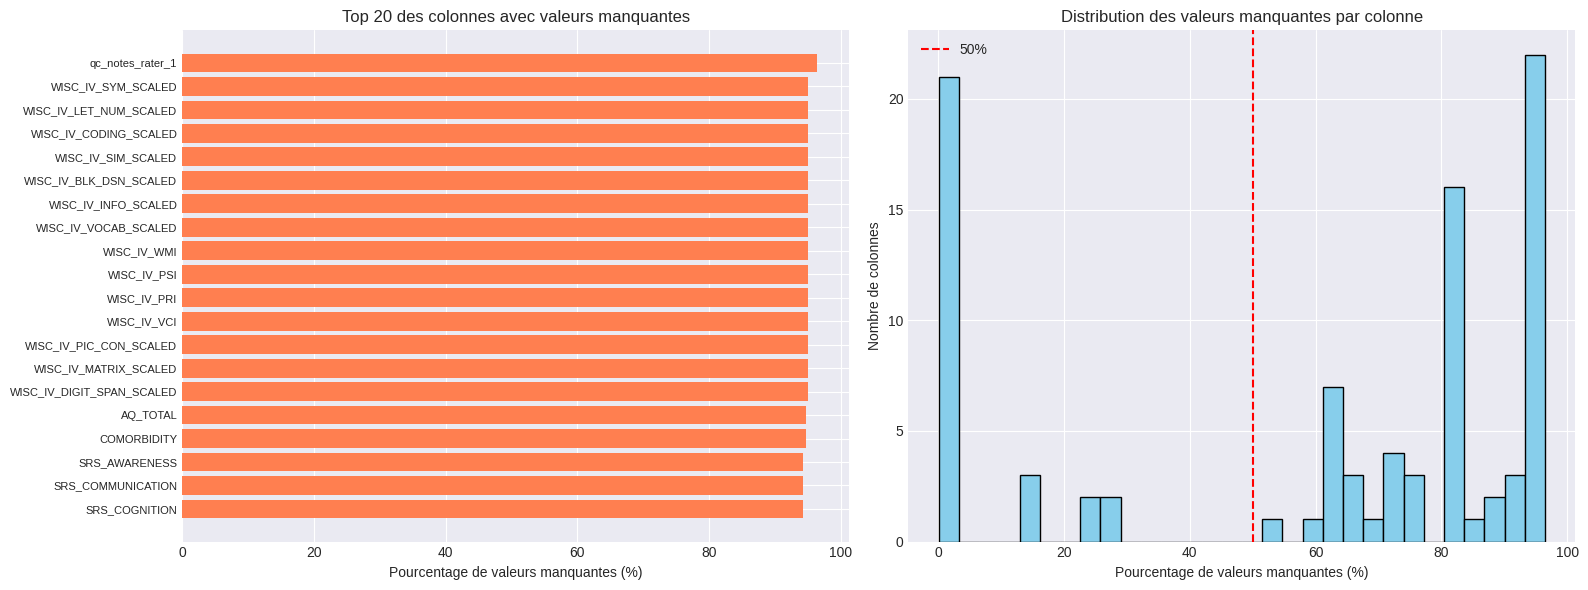

In [132]:
print("\n" + "="*100)
print("I.2 - ANALYSE DES VALEURS MANQUANTES")
print("="*100)

missing_data = pd.DataFrame({
    'Colonne': df.columns,
    'Nb_Manquantes': df.isnull().sum(),
    'Pct_Manquantes': (df.isnull().sum() / len(df)) * 100
})
missing_data = missing_data[missing_data['Nb_Manquantes'] > 0].sort_values(
    'Pct_Manquantes', ascending=False
)

print(f"\n Résumé:")
print(f"  Total valeurs manquantes: {df.isnull().sum().sum():,}")
print(f"  Colonnes avec valeurs manquantes: {len(missing_data)}/{len(df.columns)}")
print(f"\n Top 20 colonnes avec le plus de valeurs manquantes:")
print(missing_data.head(20).to_string())

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 20 variables avec valeurs manquantes
if len(missing_data) > 0:
    top20 = missing_data.head(20)
    axes[0].barh(range(len(top20)), top20['Pct_Manquantes'], color='coral')
    axes[0].set_yticks(range(len(top20)))
    axes[0].set_yticklabels(top20['Colonne'], fontsize=8)
    axes[0].set_xlabel('Pourcentage de valeurs manquantes (%)')
    axes[0].set_title('Top 20 des colonnes avec valeurs manquantes')
    axes[0].invert_yaxis()

    # Distribution des pourcentages de valeurs manquantes
    axes[1].hist(missing_data['Pct_Manquantes'], bins=30, edgecolor='black', color='skyblue')
    axes[1].set_xlabel('Pourcentage de valeurs manquantes (%)')
    axes[1].set_ylabel('Nombre de colonnes')
    axes[1].set_title('Distribution des valeurs manquantes par colonne')
    axes[1].axvline(50, color='red', linestyle='--', label='50%')
    axes[1].legend()

plt.tight_layout()
plt.show()


Création d'une heatmap de valeurs manquantes


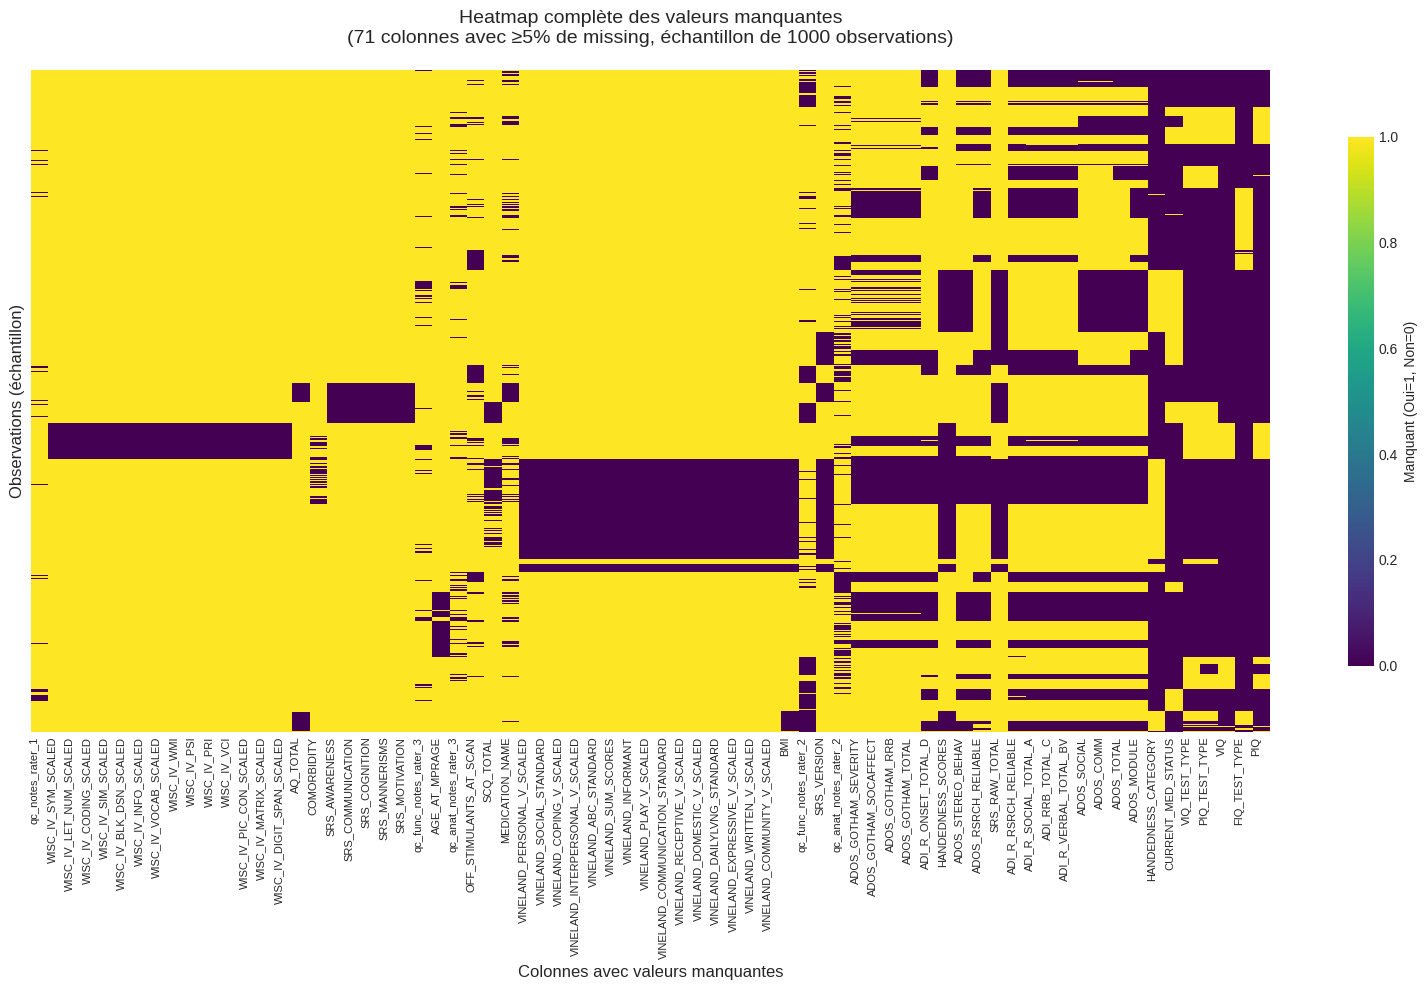

In [133]:
print("\nCréation d'une heatmap de valeurs manquantes")
if len(missing_data) > 0:
    # Prendre les colonnes avec au moins 5% de valeurs manquantes
    cols_with_missing = missing_data[missing_data['Pct_Manquantes'] >= 5]['Colonne'].tolist()
    if len(cols_with_missing) > 0:
        fig, ax = plt.subplots(figsize=(16, 10))
        # Échantillonner les observations si trop nombreuses
        if len(df) > 1000:
            sample_size = 1000
            sample_indices = np.random.choice(df.index, size=sample_size, replace=False)
            sample_indices = sorted(sample_indices)
            missing_matrix = df.loc[sample_indices, cols_with_missing].isnull()
        else:
            missing_matrix = df[cols_with_missing].isnull()

        sns.heatmap(missing_matrix,
                    cbar=True,
                    yticklabels=False,
                    xticklabels=True,
                    cmap='viridis',
                    cbar_kws={'label': 'Manquant (Oui=1, Non=0)', 'shrink': 0.8},
                    ax=ax)

        ax.set_title(f'Heatmap complète des valeurs manquantes\n({len(cols_with_missing)} colonnes avec ≥5% de missing, échantillon de {len(missing_matrix)} observations)',
                     fontsize=14, pad=20)
        ax.set_xlabel('Colonnes avec valeurs manquantes', fontsize=12)
        ax.set_ylabel(f'Observations (échantillon)', fontsize=12)
        plt.setp(ax.get_xticklabels(), rotation=90, ha='right', fontsize=8)

        plt.tight_layout()
        plt.show()



### SUPPRESSION DES COLONNES INUTILES avec 90 % valeurs manquantes

In [134]:
print("\n" + "="*100)
print("2.1 - SUPPRESSION DES COLONNES avec 90 % valeurs manquantes")
print("="*100)
threshold = 90
cols_to_drop = missing_data[missing_data['Pct_Manquantes'] > threshold]['Colonne'].tolist()
df_clean = df.drop(columns=cols_to_drop)

print(f"Supprimé {len(cols_to_drop)} colonnes avec >{threshold}% de missing")
print(f"Nouvelle dimension: {df_clean.shape}")


2.1 - SUPPRESSION DES COLONNES avec 90 % valeurs manquantes
Supprimé 25 colonnes avec >90% de missing
Nouvelle dimension: (1112, 81)


### imputation des valeurs manquantes

In [135]:
print("\nTraitement des valeurs manquantes")
print(f"Avant : {df.isnull().sum().sum()} valeurs manquantes")

for col in missing_data['Colonne']:
    # Variables numériques → médiane
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].median(), inplace=True)

    # Variables catégorielles → mode
    else:
        if not df[col].mode().empty:
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna("Inconnu", inplace=True)

print(f"Après : {df.isnull().sum().sum()} valeurs manquantes")



Traitement des valeurs manquantes
Avant : 60746 valeurs manquantes
Après : 0 valeurs manquantes


### I.3: DISTINCTION VARIABLES NUMÉRIQUES ET CATÉGORIQUES

In [136]:
from IPython.display import display
print("\n" + "="*100)
print(" I.3 - DISTINCTION VARIABLES NUMÉRIQUES ET CATÉGORIQUES")
print("="*100)

# Colonnes à exclure (ID, index)
id_cols = ['Unnamed: 0','Unnamed: 0.1', 'SUB_ID', 'X', 'subject', 'FILE_ID']
df_clean = df.drop(columns=[col for col in id_cols if col in df.columns], errors='ignore')

# Identification automatique
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()

# Affiner la distinction (certaines variables numériques sont catégoriques)
# Variables binaires/ordinales à traiter comme catégoriques
quasi_categorical = ['DX_GROUP', 'DSM_IV_TR', 'SEX', 'ADOS_MODULE', 'SRS_VERSION',
                     'CURRENT_MED_STATUS', 'SUB_IN_SMP', 'OFF_STIMULANTS_AT_SCAN',
                     'ADI_R_RSRCH_RELIABLE', 'ADOS_RSRCH_RELIABLE']

for col in quasi_categorical:
    if col in numerical_cols and col in df_clean.columns:
        if df_clean[col].nunique() <= 10:
            numerical_cols.remove(col)
            categorical_cols.append(col)

num_summary = pd.DataFrame({
    'Variable': numerical_cols,
    'Type': 'Numérique',
    'Valeurs_uniques': [df_clean[col].nunique() for col in numerical_cols],
    'Min': [df_clean[col].min() for col in numerical_cols],
    'Max': [df_clean[col].max() for col in numerical_cols]
})
print("Variables numériques :")
display(num_summary)
cat_summary = pd.DataFrame({
    'Variable': categorical_cols,
    'Type': 'Catégorique',
    'Valeurs_uniques': [df_clean[col].nunique() for col in categorical_cols],

})
print("\nVariables catégoriques :")
display(cat_summary)



 I.3 - DISTINCTION VARIABLES NUMÉRIQUES ET CATÉGORIQUES
Variables numériques :


,Variable,Type,Valeurs_uniques,Min,Max
0,AGE_AT_SCAN,Numérique,709,6.470000,64.000000
1,HANDEDNESS_SCORES,Numérique,106,-9999.000000,100.000000
2,FIQ,Numérique,124,-9999.000000,148.000000
3,VIQ,Numérique,88,-9999.000000,180.000000
4,PIQ,Numérique,84,-9999.000000,157.000000
...,...,...,...,...,...
68,func_quality,Numérique,1097,0.001693,0.098614
69,func_mean_fd,Numérique,1097,0.016117,1.434912
70,func_num_fd,Numérique,153,0.000000,288.000000
71,func_perc_fd,Numérique,451,0.000000,91.735537



Variables catégoriques :


,Variable,Type,Valeurs_uniques
0,SITE_ID,Catégorique,20
1,HANDEDNESS_CATEGORY,Catégorique,6
2,FIQ_TEST_TYPE,Catégorique,13
3,VIQ_TEST_TYPE,Catégorique,12
4,PIQ_TEST_TYPE,Catégorique,13
5,COMORBIDITY,Catégorique,39
6,CURRENT_MED_STATUS,Catégorique,4
7,MEDICATION_NAME,Catégorique,101
8,qc_rater_1,Catégorique,3
9,qc_notes_rater_1,Catégorique,18


### I.4: DISTRIBUTION DES VARIABLES NUMÉRIQUES


I.4 - DISTRIBUTION DES VARIABLES NUMÉRIQUES

 Statistiques de distribution (variables clés):

AGE_AT_SCAN:
  Moyenne: 17.05
  Médiane: 14.66
  Écart-type: 8.04
  Skewness: 1.76 (asymétrie droite)
  Kurtosis: 4.00
  Range: [6.47, 64.00]

FIQ:
  Moyenne: -227.94
  Médiane: 108.00
  Écart-type: 1813.63
  Skewness: -5.21 (asymétrie gauche)
  Kurtosis: 25.20
  Range: [-9999.00, 148.00]

VIQ:
  Moyenne: -55.76
  Médiane: 108.00
  Écart-type: 1276.09
  Skewness: -7.68 (asymétrie gauche)
  Kurtosis: 57.04
  Range: [-9999.00, 180.00]

PIQ:
  Moyenne: -93.25
  Médiane: 107.00
  Écart-type: 1408.00
  Skewness: -6.91 (asymétrie gauche)
  Kurtosis: 45.77
  Range: [-9999.00, 157.00]

BMI:
  Moyenne: -9152.03
  Médiane: -9999.00
  Écart-type: 2788.53
  Skewness: 2.99 (asymétrie droite)
  Kurtosis: 6.96
  Range: [-9999.00, 35.43]

anat_snr:
  Moyenne: 47.80
  Médiane: 15.60
  Écart-type: 281.10
  Skewness: 13.63 (asymétrie droite)
  Kurtosis: 224.97
  Range: [0.00, 5957.20]

func_mean_fd:
  Moyenne: 

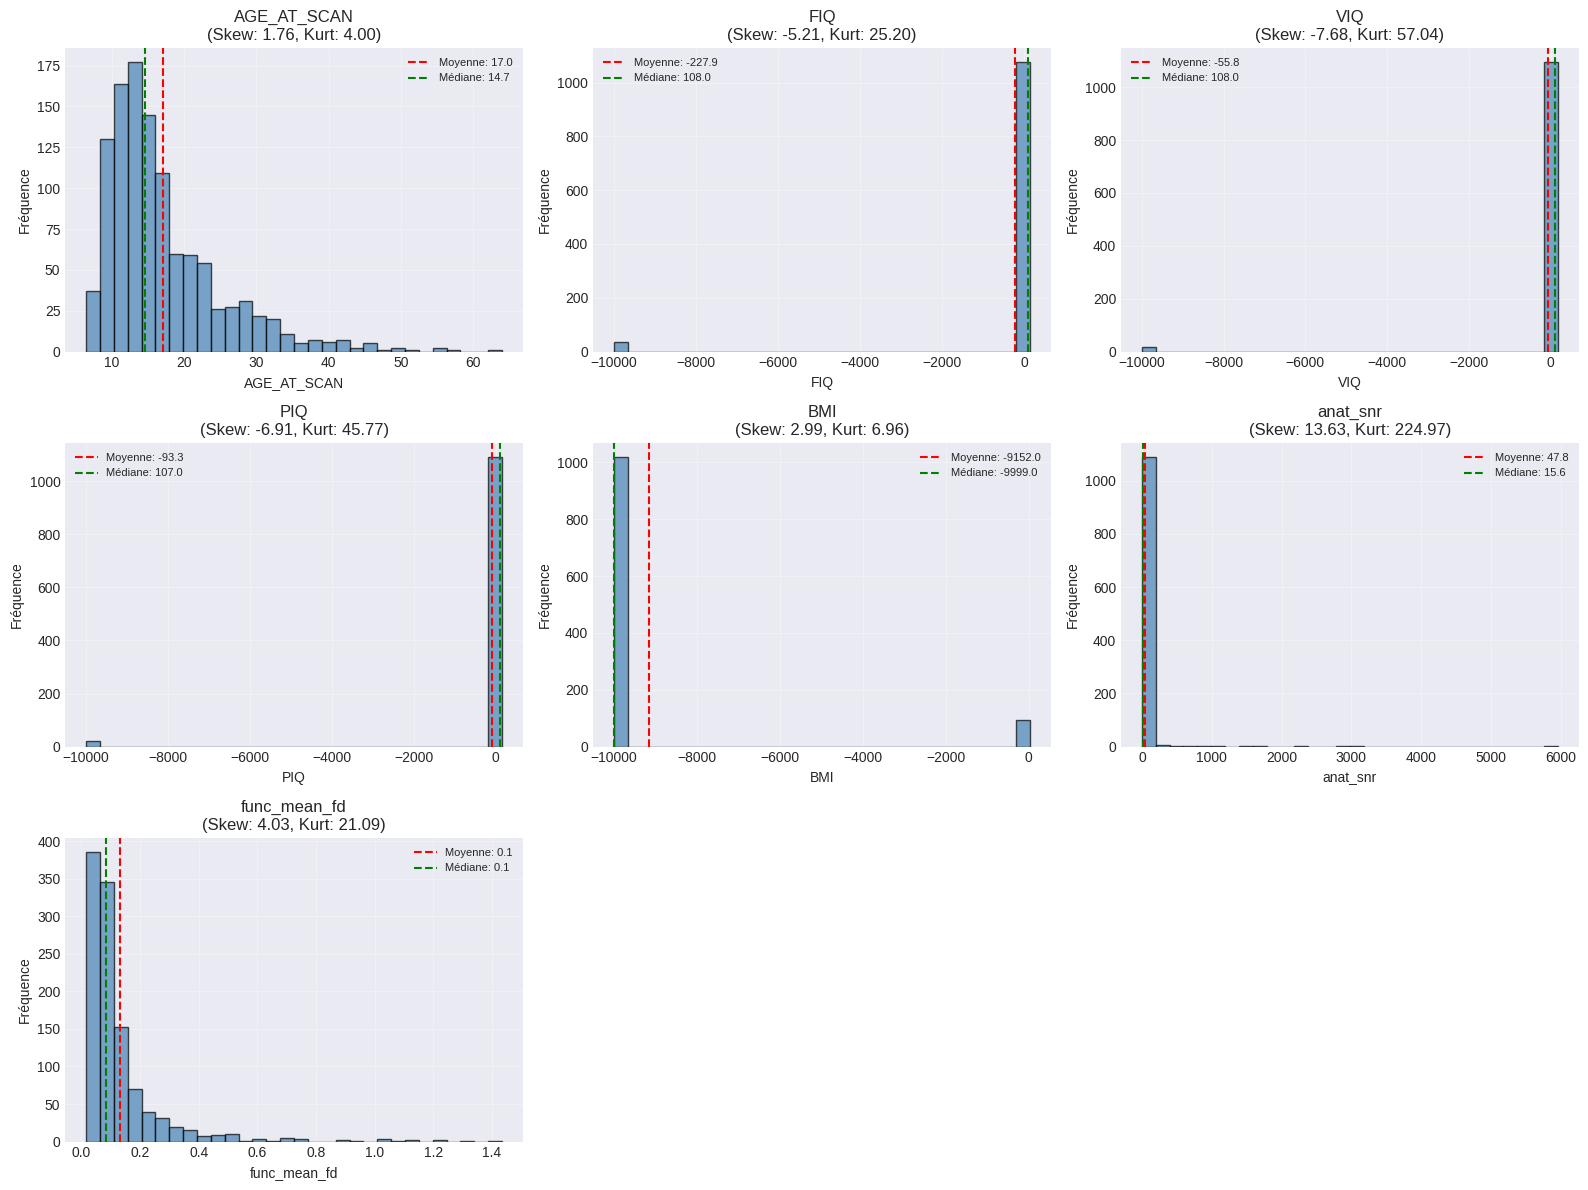

In [137]:
print("\n" + "="*100)
print("I.4 - DISTRIBUTION DES VARIABLES NUMÉRIQUES")
print("="*100)

# Statistiques de distribution pour les variables clés
variables_cles = ['AGE_AT_SCAN', 'FIQ', 'VIQ', 'PIQ', 'BMI', 'anat_snr', 'func_mean_fd']
variables_cles = [v for v in variables_cles if v in numerical_cols]
print("\n Statistiques de distribution (variables clés):")
for col in variables_cles:
    data = df_clean[col].dropna()
    if len(data) > 0:
        print(f"\n{col}:")
        print(f"  Moyenne: {data.mean():.2f}")
        print(f"  Médiane: {data.median():.2f}")
        print(f"  Écart-type: {data.std():.2f}")
        print(f"  Skewness: {data.skew():.2f} {'(asymétrie droite)' if data.skew() > 0 else '(asymétrie gauche)'}")
        print(f"  Kurtosis: {data.kurtosis():.2f}")
        print(f"  Range: [{data.min():.2f}, {data.max():.2f}]")

# Visualisation distributions
n_vars = min(len(variables_cles), 9)
if n_vars > 0:
    fig, axes = plt.subplots(3, 3, figsize=(16, 12))
    axes = axes.ravel()
    for idx, col in enumerate(variables_cles[:n_vars]):
        data = df_clean[col].dropna()
        axes[idx].hist(data, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
        axes[idx].axvline(data.mean(), color='red', linestyle='--', label=f'Moyenne: {data.mean():.1f}')
        axes[idx].axvline(data.median(), color='green', linestyle='--', label=f'Médiane: {data.median():.1f}')
        axes[idx].set_title(f'{col}\n(Skew: {data.skew():.2f}, Kurt: {data.kurtosis():.2f})')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Fréquence')
        axes[idx].legend(fontsize=8)
        axes[idx].grid(alpha=0.3)

    # Masquer les axes vides
    for idx in range(n_vars, 9):
        axes[idx].axis('off')
    plt.tight_layout()
    plt.show()

### I.5: DISTRIBUTION DES VARIABLES CATÉGORIQUES


I.5 - DISTRIBUTION DES VARIABLES CATÉGORIQUES

DX_GROUP:
DX_GROUP
2    573
1    539
Name: count, dtype: int64

SEX:
SEX
1    948
2    164
Name: count, dtype: int64

SITE_ID:
SITE_ID
NYU         184
UM_1        110
USM         101
UCLA_1       82
MAX_MUN      57
PITT         57
YALE         56
KKI          55
TRINITY      49
STANFORD     40
CALTECH      38
OLIN         36
SDSU         36
LEUVEN_2     35
UM_2         35
SBL          30
LEUVEN_1     29
OHSU         28
CMU          27
UCLA_2       27
Name: count, dtype: int64

DSM_IV_TR:
DSM_IV_TR
 0       558
 1       347
 2        93
-9999     72
 3        36
 4         6
Name: count, dtype: int64

HANDEDNESS_CATEGORY:
HANDEDNESS_CATEGORY
R        1008
L          71
Ambi       15
-9999      11
Mixed       6
L->R        1
Name: count, dtype: int64

CURRENT_MED_STATUS:
CURRENT_MED_STATUS
0        968
1        136
-9999      7
`          1
Name: count, dtype: int64

SUB_IN_SMP:
SUB_IN_SMP
1    763
0    349
Name: count, dtype: int64


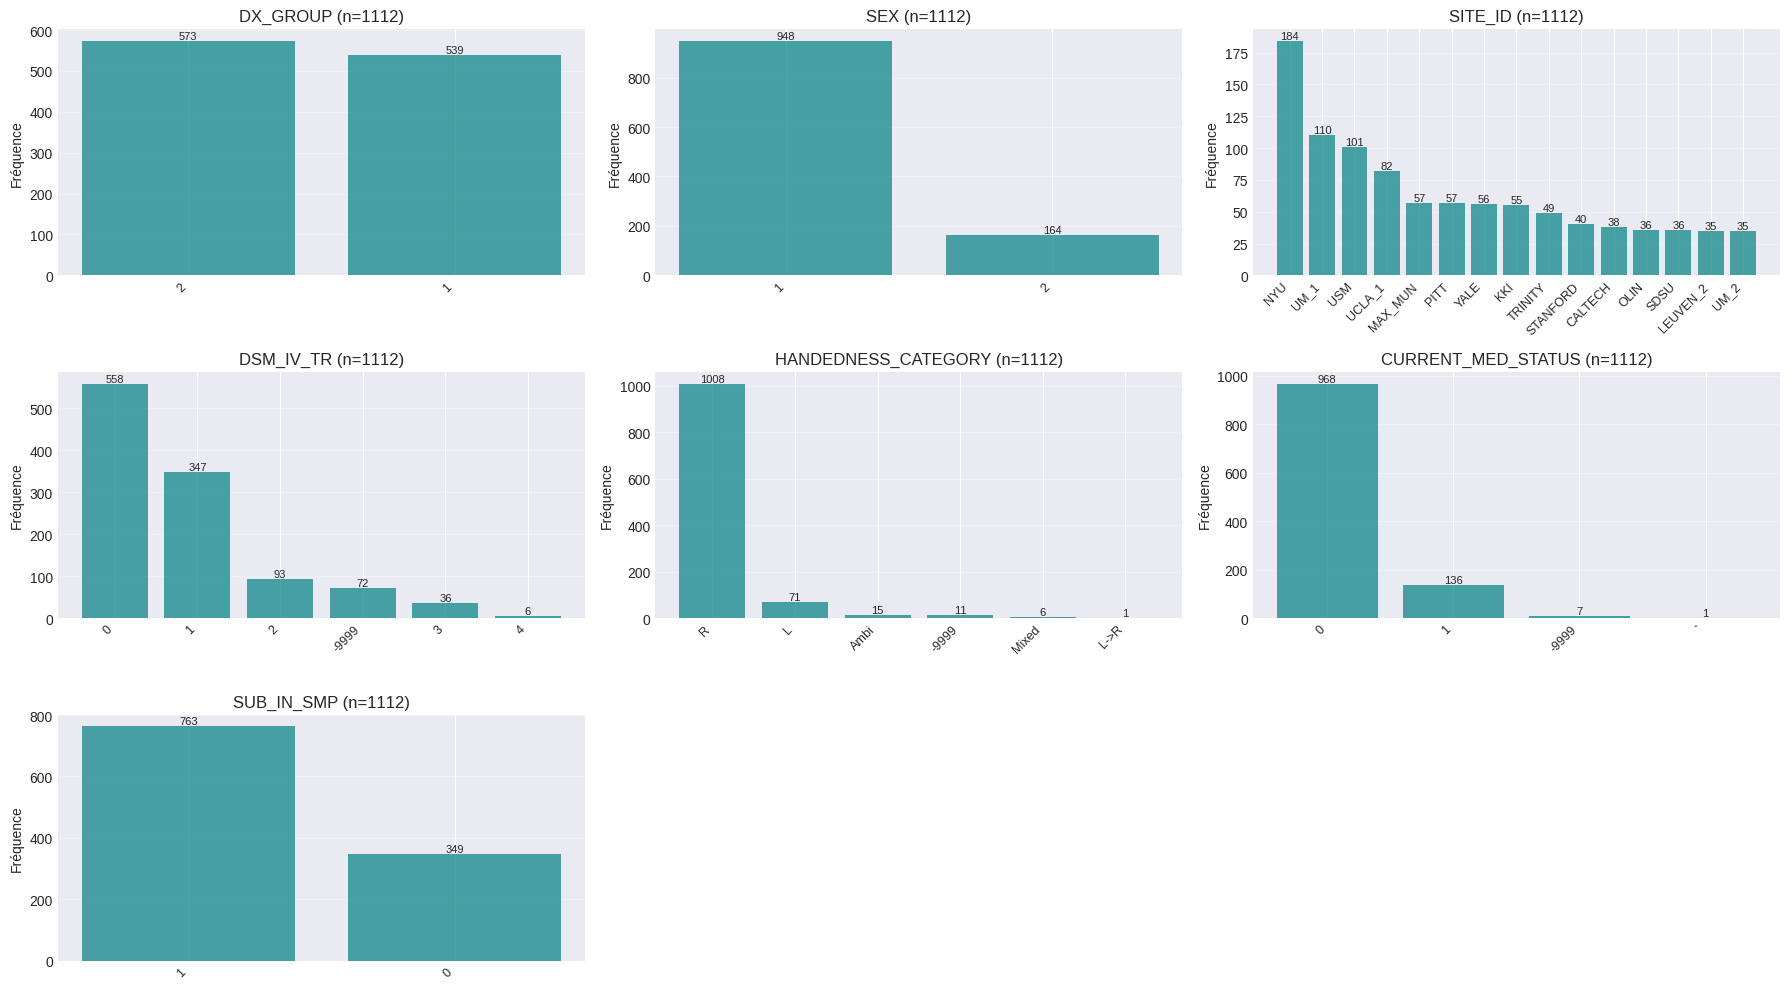

In [138]:
print("\n" + "="*100)
print("I.5 - DISTRIBUTION DES VARIABLES CATÉGORIQUES")
print("="*100)

variables_cat_cles = ['DX_GROUP', 'SEX', 'SITE_ID', 'DSM_IV_TR', 'HANDEDNESS_CATEGORY',
                      'CURRENT_MED_STATUS', 'SUB_IN_SMP']
variables_cat_cles = [v for v in variables_cat_cles if v in categorical_cols]

for col in variables_cat_cles:
    print(f"\n{col}:")
    value_counts = df_clean[col].value_counts()
    print(value_counts)
# Visualisation
n_cat = min(len(variables_cat_cles), 9)
if n_cat > 0:
    fig, axes = plt.subplots(3, 3, figsize=(18, 10))
    axes = axes.ravel()

    for idx, col in enumerate(variables_cat_cles[:n_cat]):
        value_counts = df_clean[col].value_counts().head(15)
        bars = axes[idx].bar(range(len(value_counts)), value_counts.values, color='teal', alpha=0.7)
        axes[idx].set_xticks(range(len(value_counts)))
        axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=9)
        axes[idx].set_title(f'{col} (n={df_clean[col].notna().sum()})')
        axes[idx].set_ylabel('Fréquence')
        axes[idx].grid(axis='y', alpha=0.3)

        # Ajouter les valeurs sur les barres
        for bar in bars:
            height = bar.get_height()
            axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                          f'{int(height)}',
                          ha='center', va='bottom', fontsize=8)

    for idx in range(n_cat, 9):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

### I.6: BOXPLOTS POUR LES VARIABLES NUMÉRIQUES


I.6 - BOXPLOTS POUR LES VARIABLES NUMÉRIQUES


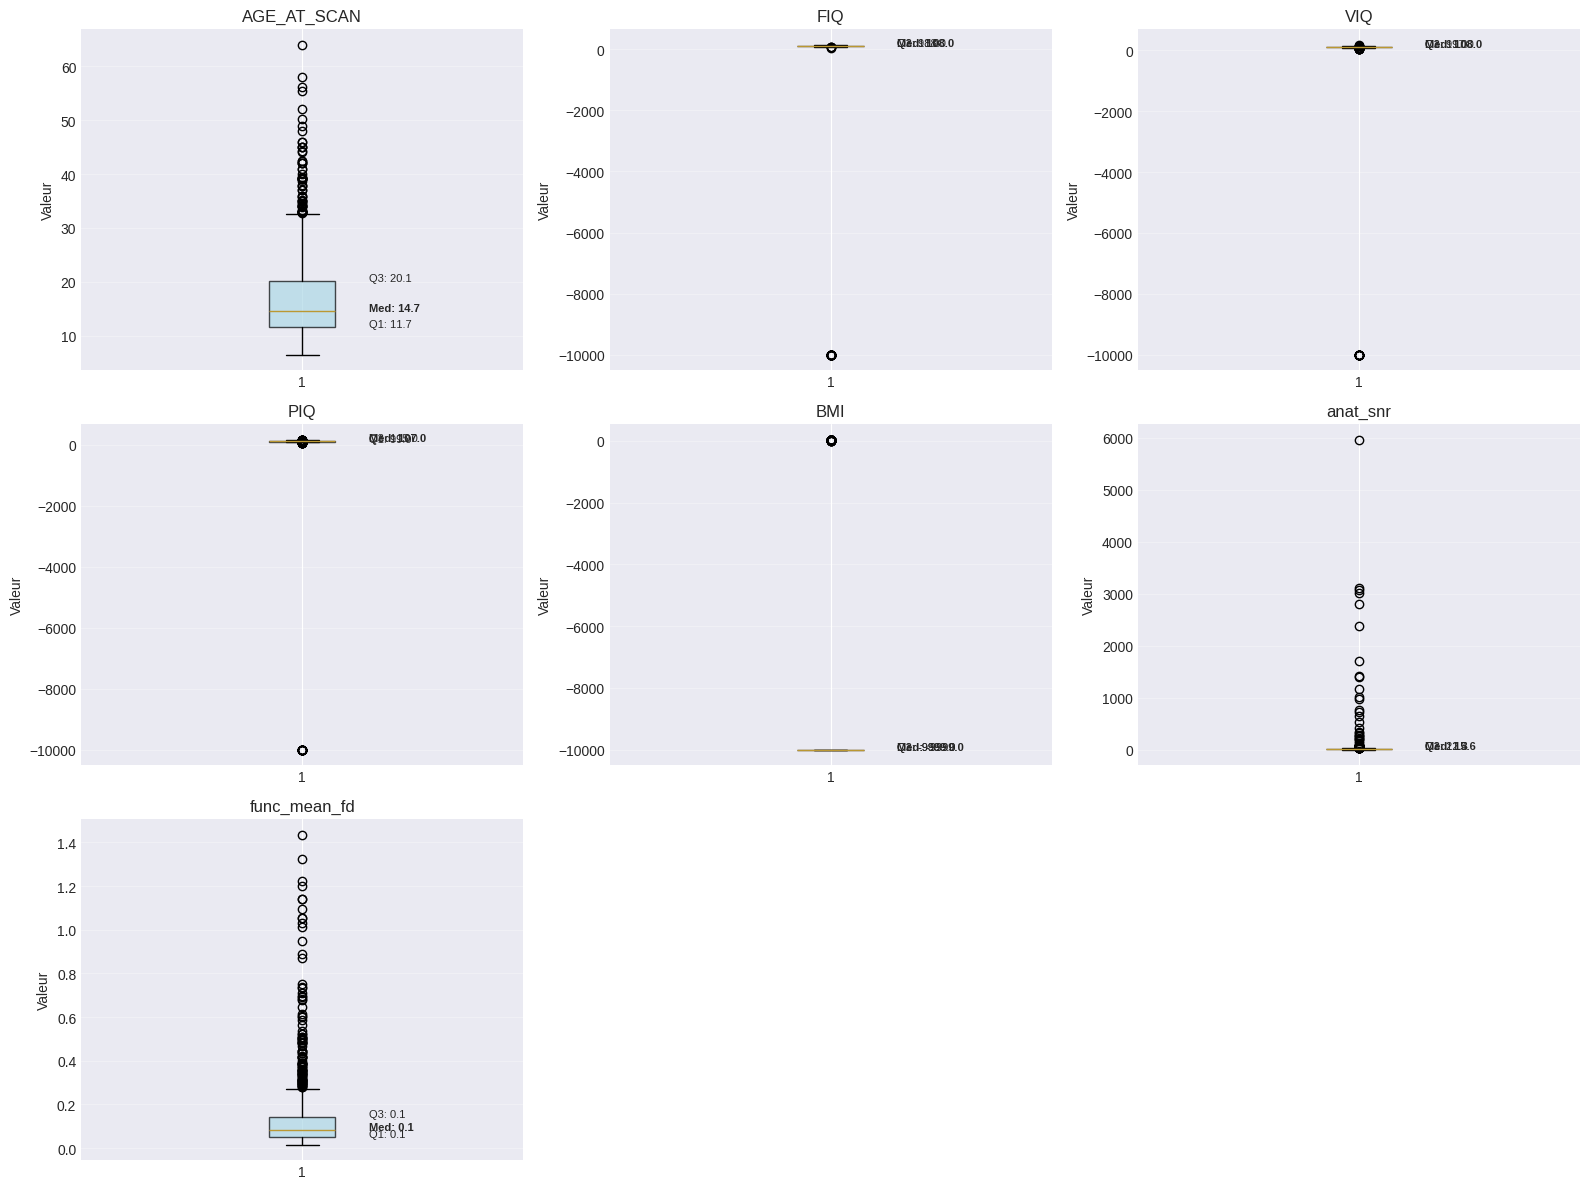

In [139]:
print("\n" + "="*100)
print("I.6 - BOXPLOTS POUR LES VARIABLES NUMÉRIQUES")
print("="*100)

if len(variables_cles) > 0:
    fig, axes = plt.subplots(3, 3, figsize=(16, 12))
    axes = axes.ravel()

    for idx, col in enumerate(variables_cles[:9]):
        data = df_clean[col].dropna()
        bp = axes[idx].boxplot(data, vert=True, patch_artist=True)
        bp['boxes'][0].set_facecolor('lightblue')
        bp['boxes'][0].set_alpha(0.7)

        # Ajouter statistiques
        q1, median, q3 = data.quantile([0.25, 0.5, 0.75])
        axes[idx].text(1.15, q1, f'Q1: {q1:.1f}', fontsize=8)
        axes[idx].text(1.15, median, f'Med: {median:.1f}', fontsize=8, weight='bold')
        axes[idx].text(1.15, q3, f'Q3: {q3:.1f}', fontsize=8)

        axes[idx].set_title(f'{col}')
        axes[idx].set_ylabel('Valeur')
        axes[idx].grid(alpha=0.3, axis='y')

    for idx in range(len(variables_cles), 9):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

### I.7: FONCTION DE DÉTECTION DES OUTLIERS


I.7 - DÉTECTION DES OUTLIERS

 Outliers détectés (méthode IQR):
    Variable  Nb_Outliers Pct_Outliers Borne_Inf Borne_Sup
 AGE_AT_SCAN           61        5.49%     -0.98     32.72
         FIQ           41        3.69%     68.00    148.00
         VIQ           39        3.51%     72.00    144.00
         PIQ           53        4.77%     75.00    139.00
         BMI           94        8.45%  -9999.00  -9999.00
    anat_snr           95        8.54%     -1.35     35.10
func_mean_fd          101        9.08%     -0.08      0.28


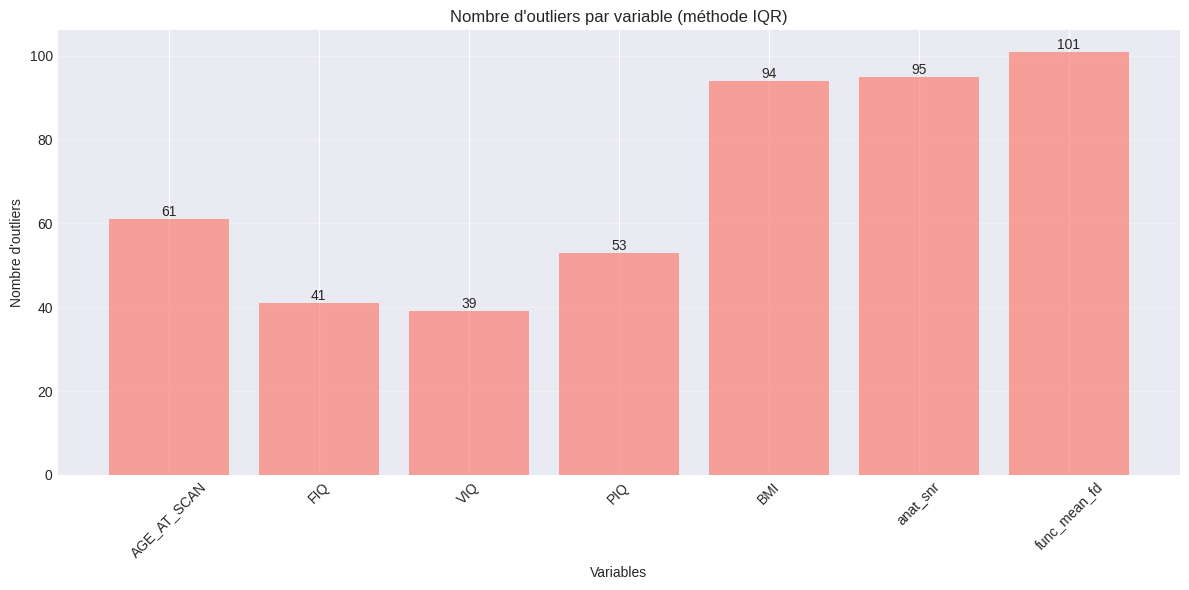

In [140]:
print("\n" + "="*100)
print("I.7 - DÉTECTION DES OUTLIERS")
print("="*100)

def detect_outliers_iqr(data, column):
    """Détecte les outliers avec la méthode IQR"""
    col_data = data[column].dropna()
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound, len(outliers)

print("\n Outliers détectés (méthode IQR):")
outliers_summary = []
for col in variables_cles:
    if col in df_clean.columns:
        outliers, lower, upper, n_outliers = detect_outliers_iqr(df_clean, col)
        pct_outliers = (n_outliers / df_clean[col].notna().sum()) * 100 if df_clean[col].notna().sum() > 0 else 0
        if n_outliers > 0:
          outliers_summary.append({
            'Variable': col,
            'Nb_Outliers': n_outliers,
            'Pct_Outliers': f"{pct_outliers:.2f}%",
            'Borne_Inf': f"{lower:.2f}",
            'Borne_Sup': f"{upper:.2f}"
          })

outliers_df = pd.DataFrame(outliers_summary)
print(outliers_df.to_string(index=False))

# Visualisation des outliers
if len(variables_cles) > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    outlier_counts = [int(row['Nb_Outliers']) for _, row in outliers_df.iterrows()]
    bars = ax.bar(outliers_df['Variable'], outlier_counts, color='salmon', alpha=0.7)
    ax.set_xlabel('Variables')
    ax.set_ylabel('Nombre d\'outliers')
    ax.set_title('Nombre d\'outliers par variable (méthode IQR)')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.3)

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{int(height)}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

### I.9: STANDARDISATION DES VARIABLES NUMÉRIQUES


I.9 - STANDARDISATION DES VARIABLES NUMÉRIQUES

 73 variables numériques à standardiser

 Standardisation effectuée

 Exemple de transformation (premières variables):

AGE_AT_SCAN:
  Avant - Moyenne: 17.05, Écart-type: 8.04
  Après - Moyenne: -0.00, Écart-type: 1.00

HANDEDNESS_SCORES:
  Avant - Moyenne: 15.92, Écart-type: 738.50
  Après - Moyenne: 0.00, Écart-type: 1.00

FIQ:
  Avant - Moyenne: -227.94, Écart-type: 1813.63
  Après - Moyenne: -0.00, Écart-type: 1.00


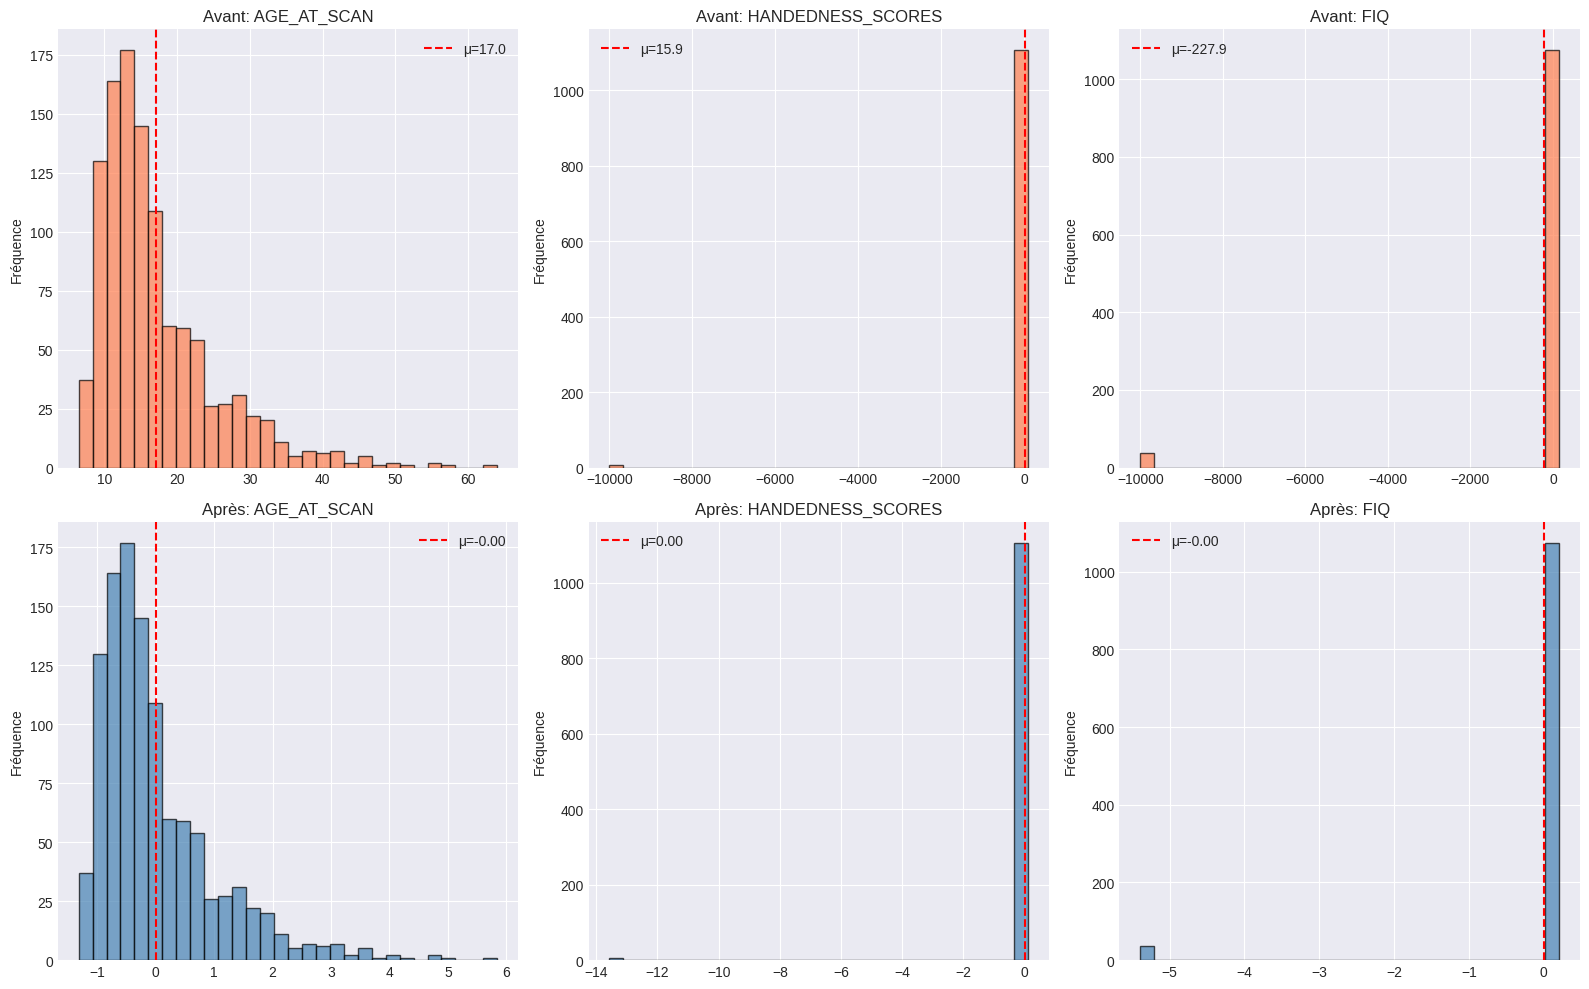

In [141]:
print("\n" + "="*100)
print("I.9 - STANDARDISATION DES VARIABLES NUMÉRIQUES")
print("="*100)

df_scaled = df_clean.copy()
target_col = 'DX_GROUP'
# Variables numériques à standardiser (exclure la cible)
numerical_cols_to_scale = [col for col in numerical_cols if col != target_col]
print(f"\n {len(numerical_cols_to_scale)} variables numériques à standardiser")

# Standardisation
scaler = StandardScaler()
if len(numerical_cols_to_scale) > 0:
    df_scaled[numerical_cols_to_scale] = scaler.fit_transform(df_scaled[numerical_cols_to_scale])

    print("\n Standardisation effectuée")
    print("\n Exemple de transformation (premières variables):")

    for col in numerical_cols_to_scale[:3]:
        print(f"\n{col}:")
        print(f"  Avant - Moyenne: {df_clean[col].mean():.2f}, Écart-type: {df_clean[col].std():.2f}")
        print(f"  Après - Moyenne: {df_scaled[col].mean():.2f}, Écart-type: {df_scaled[col].std():.2f}")

# Visualisation avant/après
if len(numerical_cols_to_scale) >= 3:
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))

    for idx, col in enumerate(numerical_cols_to_scale[:3]):
        # Avant
        axes[0, idx].hist(df_clean[col].dropna(), bins=30, edgecolor='black', alpha=0.7, color='coral')
        axes[0, idx].set_title(f'Avant: {col}')
        axes[0, idx].set_ylabel('Fréquence')
        axes[0, idx].axvline(df_clean[col].mean(), color='red', linestyle='--',
                            label=f'μ={df_clean[col].mean():.1f}')
        axes[0, idx].legend()

        # Après
        axes[1, idx].hist(df_scaled[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
        axes[1, idx].set_title(f'Après: {col}')
        axes[1, idx].set_ylabel('Fréquence')
        axes[1, idx].axvline(df_scaled[col].mean(), color='red', linestyle='--',
                            label=f'μ={df_scaled[col].mean():.2f}')
        axes[1, idx].legend()

    plt.tight_layout()
    plt.show()

### I.10: ENCODING DES VARIABLES CATÉGORIQUES

In [142]:
print("\n" + "="*100)
print("I.10 - ENCODING DES VARIABLES CATÉGORIQUES")
print("="*100)

df_encoded = df_scaled.copy()
encoding_map = {}

for col in categorical_cols:
    if col in df_encoded.columns:
        unique_vals = df_encoded[col].nunique()

        # Label Encoding pour variables binaires ou ordinales
        if unique_vals <= 5:
            le = LabelEncoder()
            non_null_mask = df_encoded[col].notna()

            if non_null_mask.sum() > 0:
                df_encoded.loc[non_null_mask, col + '_encoded'] = le.fit_transform(
                    df_encoded.loc[non_null_mask, col].astype(str)
                )
                encoding_map[col] = dict(zip(le.classes_, le.transform(le.classes_)))

                print(f"\n{col} (Label Encoding):")
                print(f"  Valeurs uniques: {unique_vals}")
                print(f"  Mapping: {encoding_map[col]}")

        # One-Hot Encoding pour variables avec plus de catégories
        else:
            print(f"\n{col} (One-Hot Encoding suggéré):")
            print(f"  Valeurs uniques: {unique_vals}")
            print(f"  Trop de catégories - considérer regroupement ou target encoding")

print(f"\n\n✓ {len(encoding_map)} variables catégoriques encodées")
print(df_encoded.shape)


I.10 - ENCODING DES VARIABLES CATÉGORIQUES

SITE_ID (One-Hot Encoding suggéré):
  Valeurs uniques: 20
  Trop de catégories - considérer regroupement ou target encoding

HANDEDNESS_CATEGORY (One-Hot Encoding suggéré):
  Valeurs uniques: 6
  Trop de catégories - considérer regroupement ou target encoding

FIQ_TEST_TYPE (One-Hot Encoding suggéré):
  Valeurs uniques: 13
  Trop de catégories - considérer regroupement ou target encoding

VIQ_TEST_TYPE (One-Hot Encoding suggéré):
  Valeurs uniques: 12
  Trop de catégories - considérer regroupement ou target encoding

PIQ_TEST_TYPE (One-Hot Encoding suggéré):
  Valeurs uniques: 13
  Trop de catégories - considérer regroupement ou target encoding

COMORBIDITY (One-Hot Encoding suggéré):
  Valeurs uniques: 39
  Trop de catégories - considérer regroupement ou target encoding

CURRENT_MED_STATUS (Label Encoding):
  Valeurs uniques: 4
  Mapping: {'-9999': np.int64(0), '0': np.int64(1), '1': np.int64(2), '`': np.int64(3)}

MEDICATION_NAME (One-Hot 

### MATRICE DE CORRÉLATION


MATRICE DE CORRÉLATION

 ANALYSE DES CORRÉLATIONS ENTRE VARIABLES
----------------------------------------------------------------------------------------------------


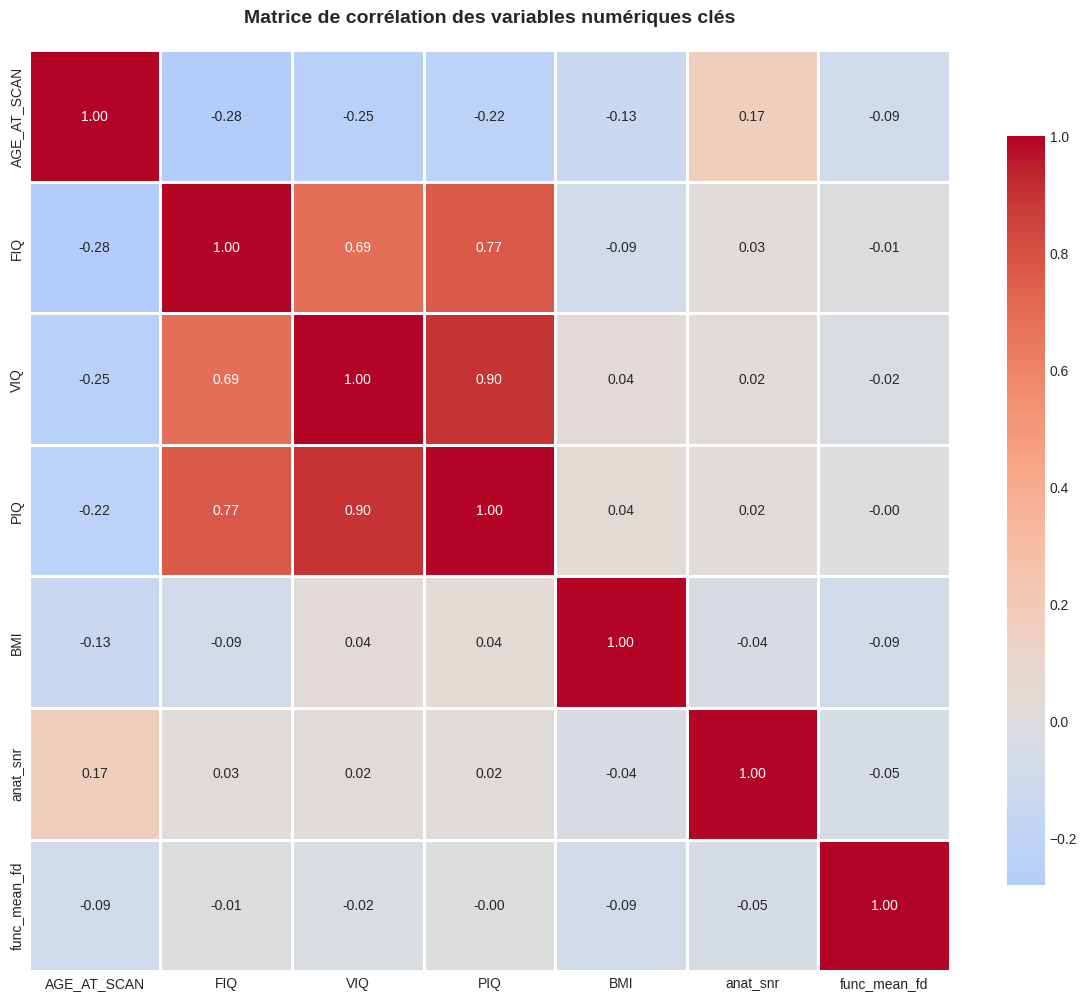


  Corrélations fortes détectées (|r| > 0.7) - Risque de multicolinéarité:
----------------------------------------------------------------------------------------------------
  • FIQ                            ↔ PIQ                           :  0.765
  • VIQ                            ↔ PIQ                           :  0.902

 CORRÉLATION AVEC LA VARIABLE CIBLE (DX_GROUP)

 Classement des variables par corrélation avec DX_GROUP:
----------------------------------------------------------------------------------------------------
Variable                             Corrélation           Force    Direction
----------------------------------------------------------------------------------------------------
func_mean_fd                              -0.185          FAIBLE   Négative 📉
PIQ                                       -0.085          FAIBLE   Négative 📉
VIQ                                       -0.079          FAIBLE   Négative 📉
BMI                                       -0.029    

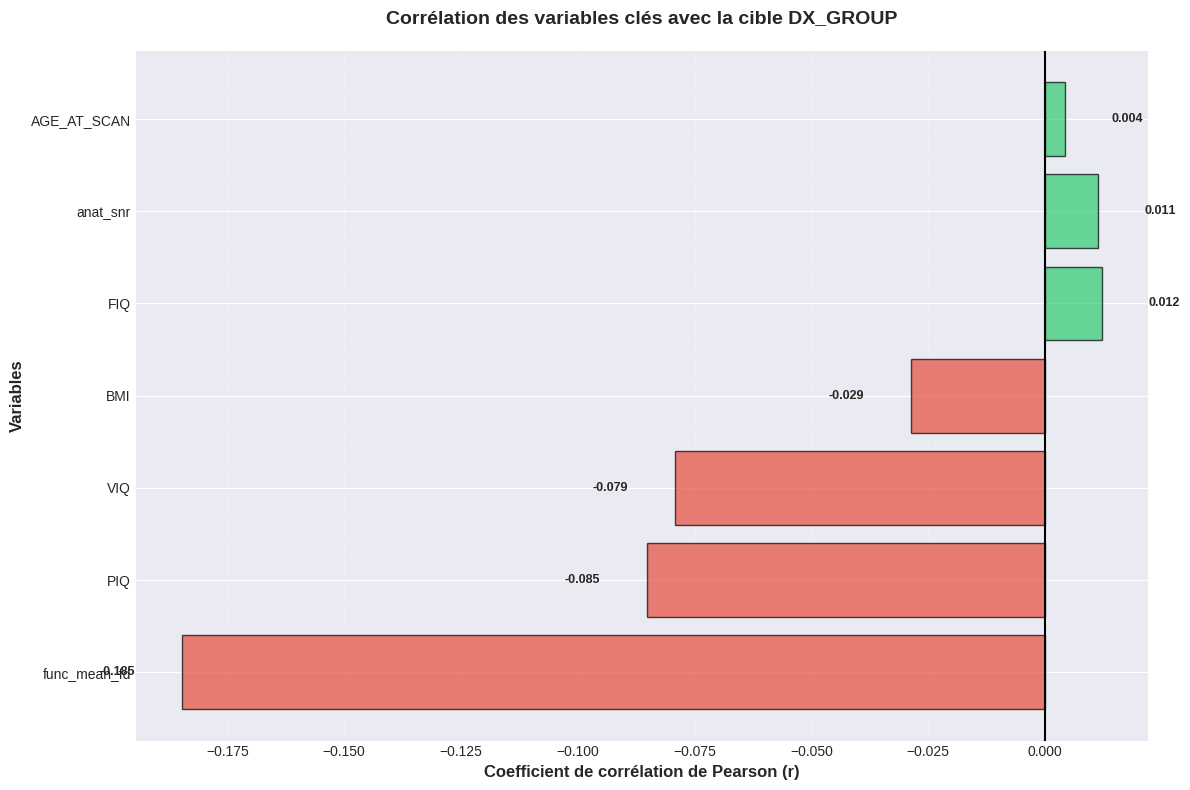


 RÉSUMÉ STATISTIQUE

 Top 3 corrélations positives (↗ avec DX_GROUP):
   1. FIQ: 0.012
   2. anat_snr: 0.011
   3. AGE_AT_SCAN: 0.004

 Top 3 corrélations négatives (↘ avec DX_GROUP):
   1. func_mean_fd: -0.185
   2. PIQ: -0.085
   3. VIQ: -0.079

 Corrélation absolue moyenne: 0.058
 Nombre de prédicteurs forts (|r| > 0.5): 0/7


In [143]:
print("\n" + "="*100)
print("MATRICE DE CORRÉLATION")
print("="*100)
# Sélectionner variables numériques standardisées (exclure la cible)
corr_vars = [col for col in variables_cles if col in df_scaled.columns and col != target_col]

if len(corr_vars) > 2:

    print("\n ANALYSE DES CORRÉLATIONS ENTRE VARIABLES")
    print("-" * 100)

    # Calculer la matrice de corrélation
    corr_matrix = df_scaled[corr_vars].corr()

    # Visualisation : Heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Matrice de corrélation des variables numériques clés',
              fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

    # Identifier et afficher les corrélations fortes
    print("\n  Corrélations fortes détectées (|r| > 0.7) - Risque de multicolinéarité:")
    print("-" * 100)
    strong_corr_found = False

    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.7:
                var1 = corr_matrix.columns[i]
                var2 = corr_matrix.columns[j]
                corr_value = corr_matrix.iloc[i, j]
                print(f"  • {var1:30s} ↔ {var2:30s}: {corr_value:6.3f}")
                strong_corr_found = True

    if not strong_corr_found:
        print("   Aucune corrélation forte détectée (bon pour la modélisation)")



    print("\n" + "="*100)
    print(" CORRÉLATION AVEC LA VARIABLE CIBLE (DX_GROUP)")
    print("="*100)

    if target_col in df.columns:

        #  3.1 Calcul des corrélations
        correlations_target = []
        for var in corr_vars:
            # Utiliser les données originales (non standardisées) pour la cible
            corr_val = df[var].corr(df[target_col])
            correlations_target.append((var, corr_val))

        # Trier par valeur absolue décroissante (importance)
        correlations_target.sort(key=lambda x: abs(x[1]), reverse=True)


        #  3.2 Affichage textuel
        print("\n Classement des variables par corrélation avec DX_GROUP:")
        print("-" * 100)
        print(f"{'Variable':<35} {'Corrélation':>12} {'Force':>15} {'Direction':>12}")
        print("-" * 100)

        for var, corr_val in correlations_target:
            # Déterminer la direction
            direction = "Positive " if corr_val > 0 else "Négative 📉"

            # Déterminer la force
            if abs(corr_val) > 0.5:
                strength = "FORTE"
            elif abs(corr_val) > 0.3:
                strength = "MODÉRÉE"
            else:
                strength = "FAIBLE"

            print(f"{var:<35} {corr_val:>12.3f} {strength:>15} {direction:>12}")


        # 3.3 Visualisation graphique
        plt.figure(figsize=(12, 8))

        # Extraire noms et valeurs
        vars_names = [x[0] for x in correlations_target]
        corr_values = [x[1] for x in correlations_target]

        # Couleurs selon le signe (vert=positif, rouge=négatif)
        colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in corr_values]

        # Créer le barplot horizontal
        bars = plt.barh(vars_names, corr_values, color=colors, alpha=0.7, edgecolor='black')

        # Ajouter les valeurs sur les barres
        for i, (bar, val) in enumerate(zip(bars, corr_values)):
            plt.text(val + 0.01 if val > 0 else val - 0.01, i,
                    f'{val:.3f}',
                    va='center', ha='left' if val > 0 else 'right',
                    fontsize=9, fontweight='bold')

        # Mise en forme
        plt.xlabel('Coefficient de corrélation de Pearson (r)', fontsize=12, fontweight='bold')
        plt.ylabel('Variables', fontsize=12, fontweight='bold')
        plt.title('Corrélation des variables clés avec la cible DX_GROUP',
                 fontsize=14, fontweight='bold', pad=20)
        plt.axvline(x=0, color='black', linestyle='-', linewidth=1.5)
        plt.grid(axis='x', alpha=0.3, linestyle='--')
        plt.tight_layout()
        plt.show()


        print("\n" + "="*100)
        print(" RÉSUMÉ STATISTIQUE")
        print("="*100)

        # Variables les plus corrélées
        top_positive = [x for x in correlations_target if x[1] > 0][:3]
        top_negative = [x for x in correlations_target if x[1] < 0][:3]

        if top_positive:
            print("\n Top 3 corrélations positives (↗ avec DX_GROUP):")
            for i, (var, corr) in enumerate(top_positive, 1):
                print(f"   {i}. {var}: {corr:.3f}")

        if top_negative:
            print("\n Top 3 corrélations négatives (↘ avec DX_GROUP):")
            for i, (var, corr) in enumerate(top_negative, 1):
                print(f"   {i}. {var}: {corr:.3f}")

        # Moyenne des corrélations absolues
        mean_abs_corr = sum(abs(x[1]) for x in correlations_target) / len(correlations_target)
        print(f"\n Corrélation absolue moyenne: {mean_abs_corr:.3f}")

        # Variables avec corrélation forte
        strong_predictors = [x for x in correlations_target if abs(x[1]) > 0.5]
        print(f" Nombre de prédicteurs forts (|r| > 0.5): {len(strong_predictors)}/{len(correlations_target)}")




### ANALYSE DE LA VARIABLE CIBLE PAR GROUPES


I.8 - ANALYSE DE LA VARIABLE CIBLE PAR GROUPES

 Variable cible: DX_GROUP
  Signification: 1=ASD (Autisme), 2=Control (Typique)

Distribution:
DX_GROUP
1    539
2    573
Name: count, dtype: int64

Proportion:
  1 (ASD (Autisme)): 48.5%
  2 (Control (Typique)): 51.5%

 Équilibre des classes:
  Classe majoritaire: 51.5%
  Classe minoritaire: 48.5%
  Ratio: 1.06:1
  Classes relativement équilibrées


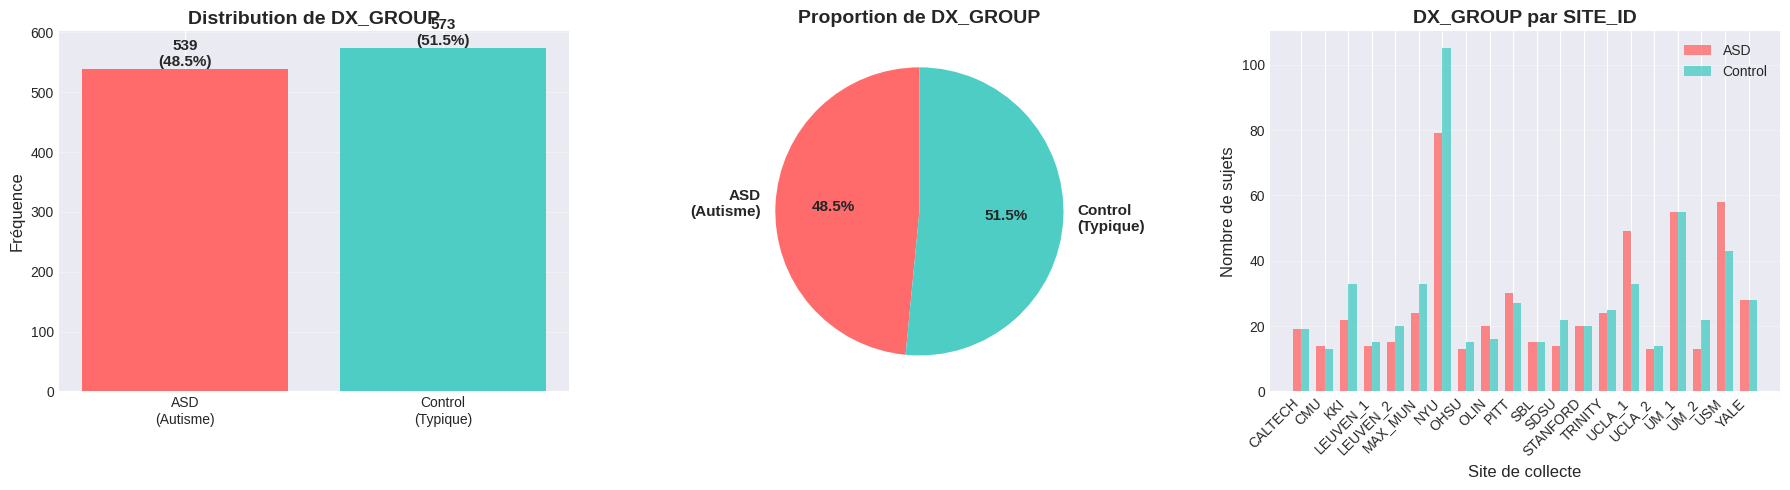

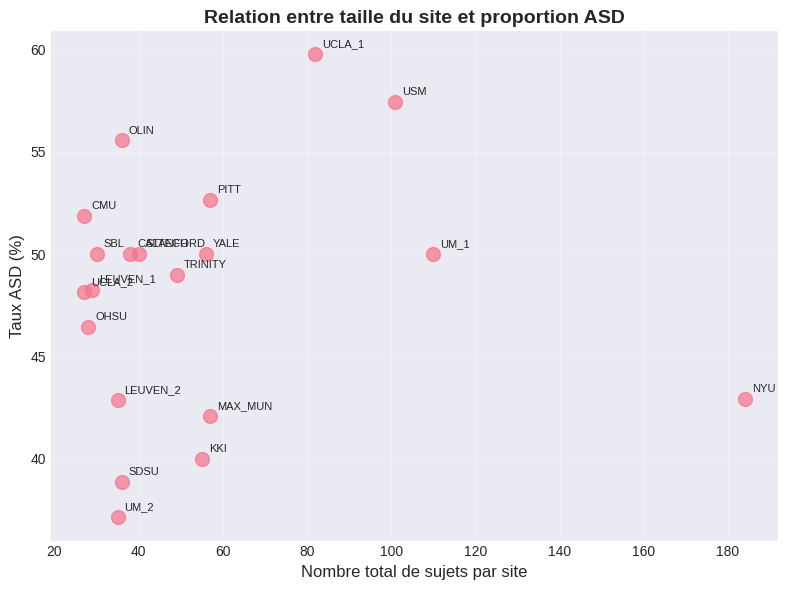

In [144]:
print("\n" + "="*100)
print("I.8 - ANALYSE DE LA VARIABLE CIBLE PAR GROUPES")
print("="*100)

# Variable cible: DX_GROUP (Diagnostic Group)
# 1 = ASD (Autism Spectrum Disorder)
# 2 = Control (Typically Developing)
target_col = 'DX_GROUP'

if target_col in df.columns:
    print(f"\n Variable cible: {target_col}")
    print(f"  Signification: 1=ASD (Autisme), 2=Control (Typique)")
    print(f"\nDistribution:")
    print(df[target_col].value_counts().sort_index())
    print(f"\nProportion:")
    prop_df = df[target_col].value_counts(normalize=True).sort_index()
    for idx, val in prop_df.items():
        label = "ASD (Autisme)" if idx == 1 else "Control (Typique)"
        print(f"  {idx} ({label}): {val*100:.1f}%")

    # Vérifier l'équilibre des classes
    class_balance = df[target_col].value_counts(normalize=True)
    min_class = class_balance.min()
    max_class = class_balance.max()

    print(f"\n Équilibre des classes:")
    print(f"  Classe majoritaire: {max_class*100:.1f}%")
    print(f"  Classe minoritaire: {min_class*100:.1f}%")
    print(f"  Ratio: {max_class/min_class:.2f}:1")

    if max_class / min_class > 1.5:
        print("  Classes déséquilibrées ")
    else:
        print("  Classes relativement équilibrées")

    # Visualisation
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Count plot
    value_counts = df[target_col].value_counts().sort_index()
    labels_map = {1: 'ASD\n(Autisme)', 2: 'Control\n(Typique)'}
    colors = ['#FF6B6B', '#4ECDC4']  # Rouge pour ASD, Bleu pour Control

    bars = axes[0].bar(range(len(value_counts)), value_counts.values, color=colors)
    axes[0].set_xticks(range(len(value_counts)))
    axes[0].set_xticklabels([labels_map.get(idx, idx) for idx in value_counts.index])
    axes[0].set_ylabel('Fréquence', fontsize=12)
    axes[0].set_title(f'Distribution de {target_col}', fontsize=14, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)

    for i, (idx, val) in enumerate(value_counts.items()):
        axes[0].text(i, val, f'{val}\n({val/len(df)*100:.1f}%)',
                    ha='center', va='bottom', fontsize=11, fontweight='bold')

    # Pie chart
    axes[1].pie(value_counts,
               labels=[labels_map.get(idx, idx) for idx in value_counts.index],
               autopct='%1.1f%%',
               colors=colors,
               startangle=90,
               textprops={'fontsize': 11, 'fontweight': 'bold'})
    axes[1].set_title(f'Proportion de {target_col}', fontsize=14, fontweight='bold')

    # Distribution par SITE (si disponible)
    if 'SITE_ID' in df.columns:
        site_dx = pd.crosstab(df['SITE_ID'], df[target_col])
        site_dx_pct = pd.crosstab(df['SITE_ID'], df[target_col], normalize='index') * 100

        x = np.arange(len(site_dx.index))
        width = 0.35

        axes[2].bar(x - width/2, site_dx[1], width, label='ASD', color=colors[0], alpha=0.8)
        axes[2].bar(x + width/2, site_dx[2], width, label='Control', color=colors[1], alpha=0.8)

        axes[2].set_xlabel('Site de collecte', fontsize=12)
        axes[2].set_ylabel('Nombre de sujets', fontsize=12)
        axes[2].set_title(f'{target_col} par SITE_ID', fontsize=14, fontweight='bold')
        axes[2].set_xticks(x)
        axes[2].set_xticklabels(site_dx.index, rotation=45, ha='right')
        axes[2].legend()
        axes[2].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()


# Scatter plot : DX_GROUP par SITE_ID

# Statistiques par site
site_stats = df.groupby('SITE_ID').agg(
    Nb_Sujets=('DX_GROUP', 'count'),
    Nb_ASD=('DX_GROUP', lambda x: (x == 1).sum())
)

site_stats['Taux_ASD'] = site_stats['Nb_ASD'] / site_stats['Nb_Sujets'] * 100

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(site_stats['Nb_Sujets'],
            site_stats['Taux_ASD'],
            s=100, alpha=0.7)

plt.xlabel('Nombre total de sujets par site', fontsize=12)
plt.ylabel('Taux ASD (%)', fontsize=12)
plt.title('Relation entre taille du site et proportion ASD', fontsize=14, fontweight='bold')

# Annotation de quelques sites (comme ton exemple)
for site in site_stats.index[:]:
    plt.annotate(site,
                 (site_stats.loc[site, 'Nb_Sujets'],
                  site_stats.loc[site, 'Taux_ASD']),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=8)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### SÉPARATION DES FEATURES ET DE LA TARGET

In [145]:
print("\n" + "="*100)
print("2.3 - SÉPARATION FEATURES ET TARGET")
print("="*100)
# Target
y = df_encoded['DX_GROUP'].copy()

# Features
X = df_encoded.drop(columns=['DX_GROUP'])

print(f"\n Target (y): {y.shape[0]} observations")
print(f"  Distribution:")
print(y.value_counts().sort_index())
print(f"\n  Features (X): {X.shape[0]} observations × {X.shape[1]} features")

# Convertir y en 0/1 (1=ASD → 1, 2=Control → 0)
y = (y == 1).astype(int)
print(f"\n✓ Target recodée: 1=ASD (Autisme), 0=Control (Typique)")
print(f"  Distribution finale:")
print(y.value_counts().sort_index())


2.3 - SÉPARATION FEATURES ET TARGET

 Target (y): 1112 observations
  Distribution:
DX_GROUP
1    539
2    573
Name: count, dtype: int64

  Features (X): 1112 observations × 113 features

✓ Target recodée: 1=ASD (Autisme), 0=Control (Typique)
  Distribution finale:
DX_GROUP
0    573
1    539
Name: count, dtype: int64


### SPLIT TRAIN/TEST

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
print("\n" + "="*100)
print("2.4 - SPLIT TRAIN/TEST")
print("="*100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\n Split effectué (80/20):")
print(f"  Train: {X_train.shape[0]} observations ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  Test:  {X_test.shape[0]} observations ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\n Distribution dans Train:")
print(y_train.value_counts().sort_index())
print(f"\n  Distribution dans Test:")
print(y_test.value_counts().sort_index())
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_train.columns,
    index=X_test.index
)



2.4 - SPLIT TRAIN/TEST

 Split effectué (80/20):
  Train: 889 observations (79.9%)
  Test:  223 observations (20.1%)

 Distribution dans Train:
DX_GROUP
0    458
1    431
Name: count, dtype: int64

  Distribution dans Test:
DX_GROUP
0    115
1    108
Name: count, dtype: int64


### FONCTION D'ÉVALUATION

In [149]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
print("\n" + "="*100)
print("3.1 - FONCTION D'ÉVALUATION")
print("="*100)

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model"):
    """
    Évalue un modèle et affiche les métriques
    """
    # Prédictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Métriques
    metrics = {
        'Model': model_name,
        'Train_Accuracy': accuracy_score(y_train, y_train_pred),
        'Test_Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1_Score': f1_score(y_test, y_test_pred)
    }

    # Probabilities pour AUC (si disponible)
    if hasattr(model, 'predict_proba'):
        y_test_proba = model.predict_proba(X_test)[:, 1]
        metrics['AUC'] = roc_auc_score(y_test, y_test_proba)
    else:
        metrics['AUC'] = None

    return metrics, y_test_pred

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    """
    Affiche la matrice de confusion
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Control', 'ASD'],
                yticklabels=['Control', 'ASD'])
    plt.title(title, fontsize=14, fontweight='bold')
    plt.ylabel('Vraie Classe', fontsize=12)
    plt.xlabel('Classe Prédite', fontsize=12)
    return cm




3.1 - FONCTION D'ÉVALUATION


### K-NEAREST NEIGHBORS (KNN)


3.2 - K-NEAREST NEIGHBORS (KNN)

 Résultats KNN:
  Model: KNN
  Train_Accuracy: 0.9359
  Test_Accuracy: 0.8655
  Precision: 0.9333
  Recall: 0.7778
  F1_Score: 0.8485
  AUC: 0.9394


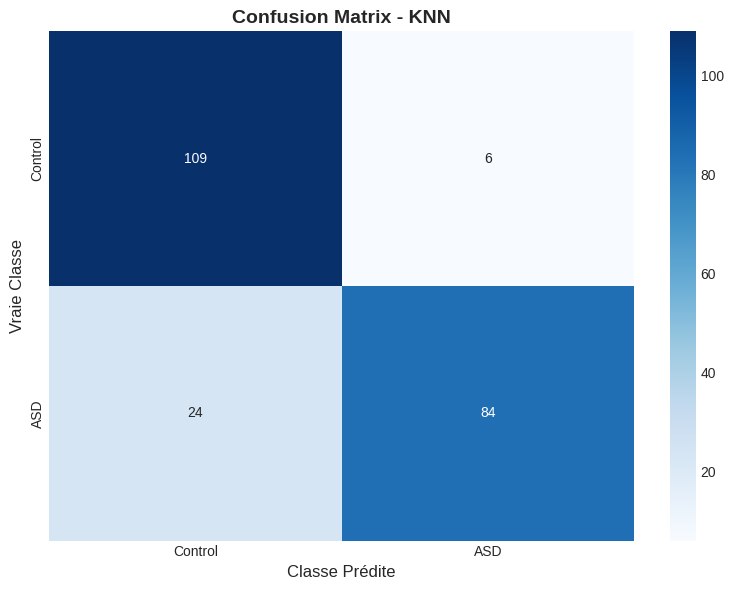

In [150]:
from sklearn.neighbors import KNeighborsClassifier
print("\n" + "="*100)
print("3.2 - K-NEAREST NEIGHBORS (KNN)")
print("="*100)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

metrics_knn, y_pred_knn = evaluate_model(knn, X_train, X_test,
                                         y_train, y_test, "KNN")

print(f"\n Résultats KNN:")
for key, value in metrics_knn.items():
    if value is not None:
        print(f"  {key}: {value:.4f}" if isinstance(value, float) else f"  {key}: {value}")

# Confusion Matrix
cm_knn = plot_confusion_matrix(y_test, y_pred_knn, "Confusion Matrix - KNN")
plt.tight_layout()
plt.show()



### LOGISTIC REGRESSION


3.3 - LOGISTIC REGRESSION

 Résultats Logistic Regression:
  Model: Logistic Regression
  Train_Accuracy: 1.0000
  Test_Accuracy: 0.9955
  Precision: 1.0000
  Recall: 0.9907
  F1_Score: 0.9953
  AUC: 0.9908


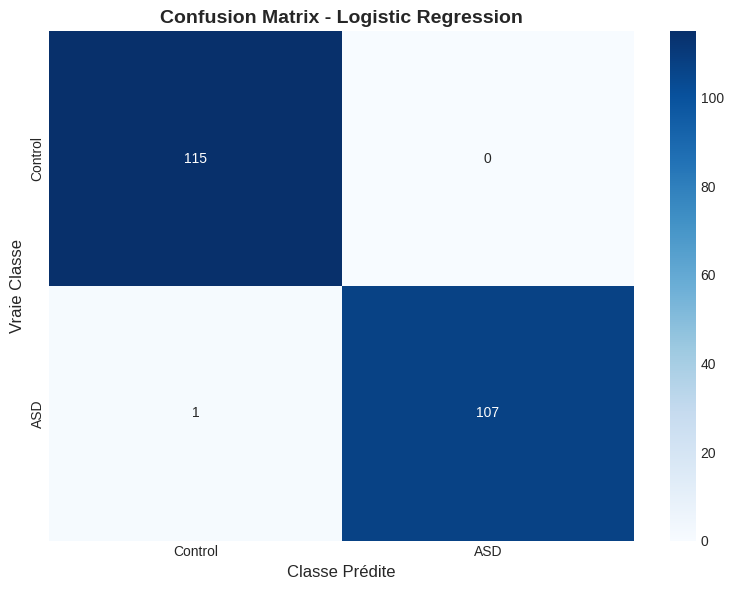

In [153]:
from sklearn.linear_model import LogisticRegression
print("\n" + "="*100)
print("3.3 - LOGISTIC REGRESSION")
print("="*100)

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

metrics_logreg, y_pred_logreg = evaluate_model(logreg, X_train_scaled, X_test_scaled,
                                                y_train, y_test, "Logistic Regression")

print(f"\n Résultats Logistic Regression:")
for key, value in metrics_logreg.items():
    if value is not None:
        print(f"  {key}: {value:.4f}" if isinstance(value, float) else f"  {key}: {value}")

cm_logreg = plot_confusion_matrix(y_test, y_pred_logreg, "Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()


### DECISION TREE AVEC VISUALISATION


3.4 - DECISION TREE AVEC VISUALISATION

 Résultats Decision Tree:
  Model: Decision Tree
  Train_Accuracy: 1.0000
  Test_Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1_Score: 1.0000
  AUC: 1.0000


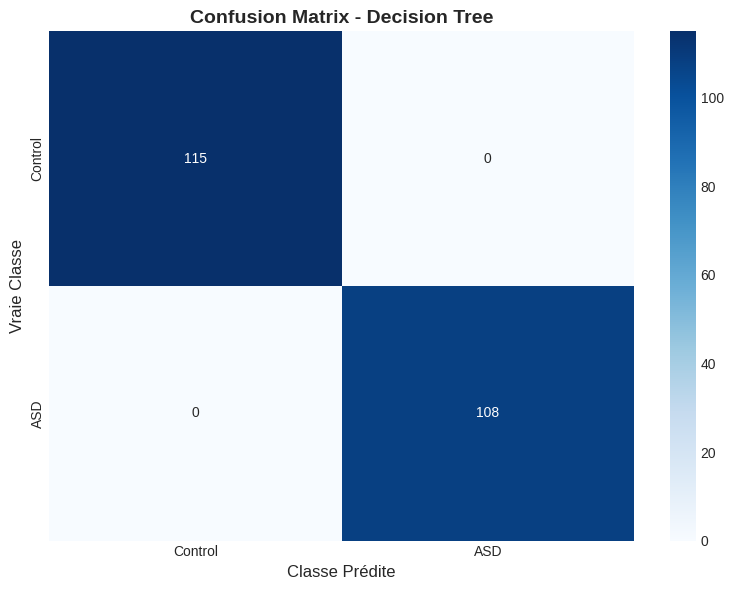

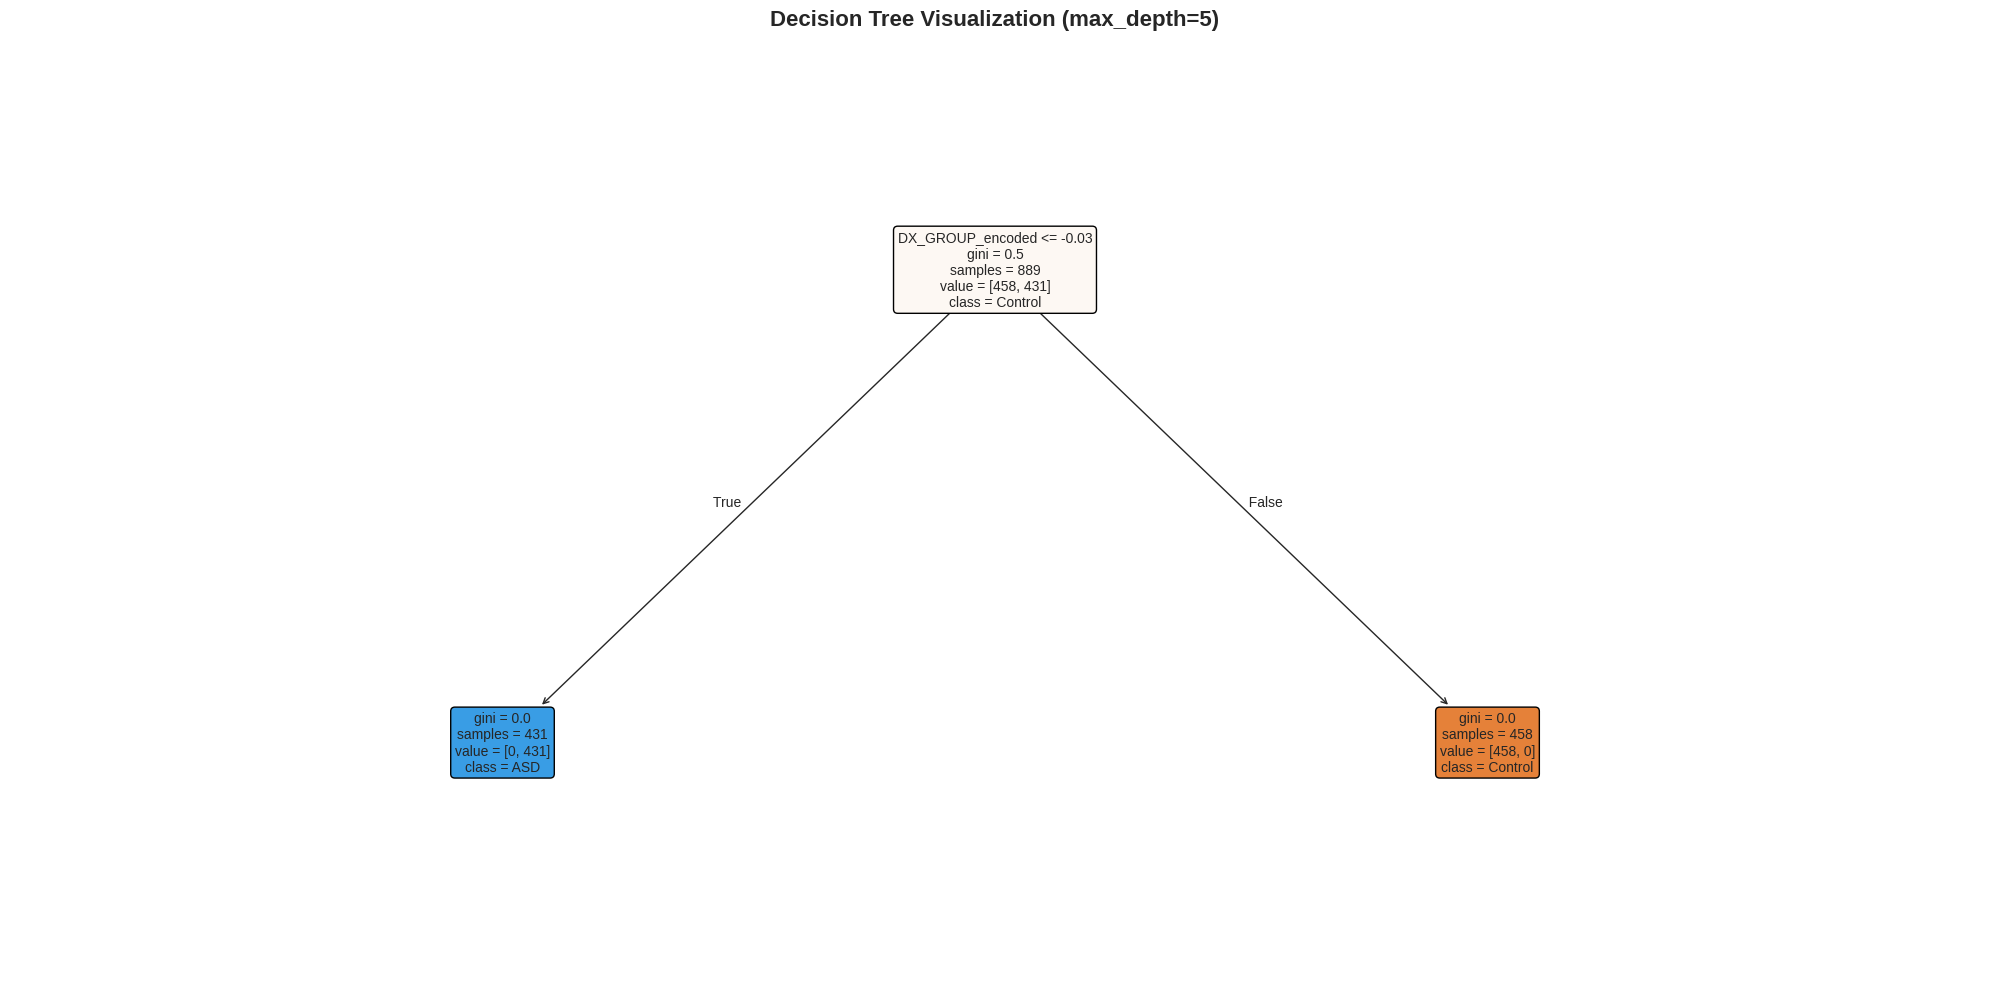

In [156]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
print("\n" + "="*100)
print("3.4 - DECISION TREE AVEC VISUALISATION")
print("="*100)

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_scaled, y_train)

metrics_dt, y_pred_dt = evaluate_model(dt, X_train_scaled, X_test_scaled,
                                       y_train, y_test, "Decision Tree")

print(f"\n Résultats Decision Tree:")
for key, value in metrics_dt.items():
    if value is not None:
        print(f"  {key}: {value:.4f}" if isinstance(value, float) else f"  {key}: {value}")

# Confusion Matrix
cm_dt = plot_confusion_matrix(y_test, y_pred_dt, "Confusion Matrix - Decision Tree")
plt.tight_layout()
plt.show()

# Visualisation de l'arbre
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X_train.columns,
          class_names=['Control', 'ASD'], rounded=True, fontsize=10)
plt.title("Decision Tree Visualization (max_depth=5)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### RANDOM FOREST AVEC FEATURE IMPORTANCE


3.5 - RANDOM FOREST AVEC FEATURE IMPORTANCE

 Résultats Random Forest:
  Model: Random Forest
  Train_Accuracy: 1.0000
  Test_Accuracy: 0.9955
  Precision: 0.9908
  Recall: 1.0000
  F1_Score: 0.9954
  AUC: 1.0000


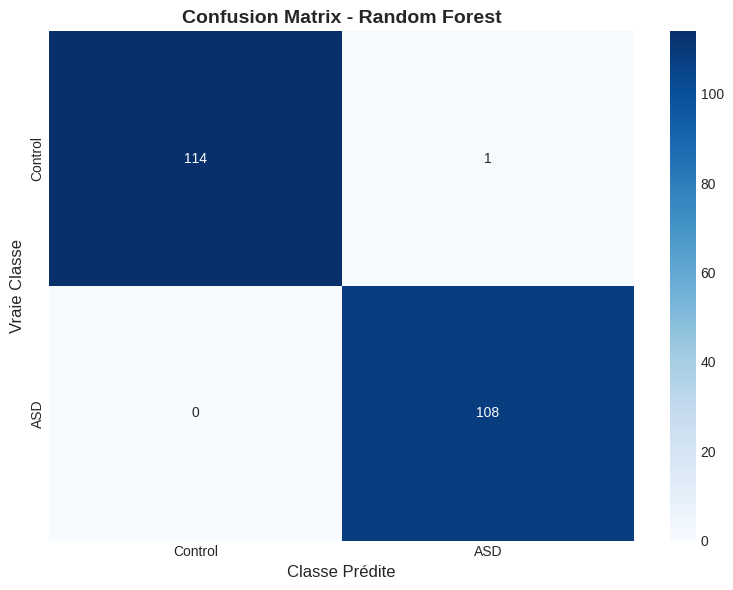


 Top 20 Features les plus importantes:
                   Feature  Importance
                 DSM_IV_TR    0.193202
          DX_GROUP_encoded    0.179348
     ADI_R_VERBAL_TOTAL_BV    0.058123
                ADOS_TOTAL    0.050946
               ADOS_SOCIAL    0.045907
      ADI_R_SOCIAL_TOTAL_A    0.041651
             SRS_RAW_TOTAL    0.034492
           ADI_RRB_TOTAL_C    0.033205
                 ADOS_COMM    0.030700
               ADOS_MODULE    0.023737
     ADOS_GOTHAM_SOCAFFECT    0.023493
         ADOS_GOTHAM_TOTAL    0.022355
CURRENT_MED_STATUS_encoded    0.021179
      ADOS_GOTHAM_SEVERITY    0.017739
           ADOS_GOTHAM_RRB    0.017085
      CURRENT_MED_STATUS_0    0.014327
      CURRENT_MED_STATUS_1    0.013176
       ADI_R_ONSET_TOTAL_D    0.012688
       ADOS_MODULE_encoded    0.010605
         ADOS_STEREO_BEHAV    0.007334


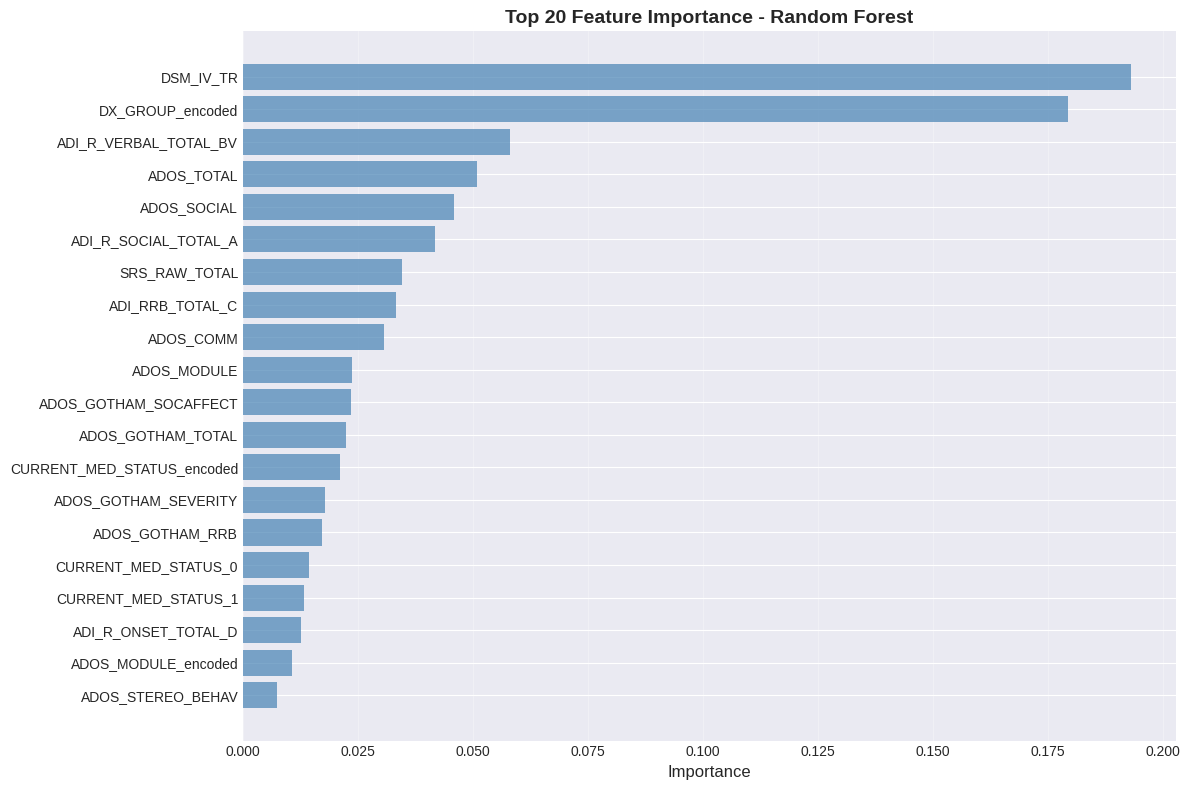

In [159]:
from sklearn.ensemble import RandomForestClassifier
print("\n" + "="*100)
print("3.5 - RANDOM FOREST AVEC FEATURE IMPORTANCE")
print("="*100)

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)

metrics_rf, y_pred_rf = evaluate_model(rf, X_train_scaled, X_test_scaled,
                                       y_train, y_test, "Random Forest")

print(f"\n Résultats Random Forest:")
for key, value in metrics_rf.items():
    if value is not None:
        print(f"  {key}: {value:.4f}" if isinstance(value, float) else f"  {key}: {value}")

# Confusion Matrix
cm_rf = plot_confusion_matrix(y_test, y_pred_rf, "Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n Top 20 Features les plus importantes:")
print(feature_importance.head(20).to_string(index=False))

# Visualisation
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(20)
plt.barh(range(len(top_features)), top_features['Importance'], color='steelblue', alpha=0.7)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance', fontsize=12)
plt.title('Top 20 Feature Importance - Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### XGBOOST


3.6 - XGBOOST

 Résultats XGBoost:
  Model: XGBoost
  Train_Accuracy: 1.0000
  Test_Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1_Score: 1.0000
  AUC: 1.0000


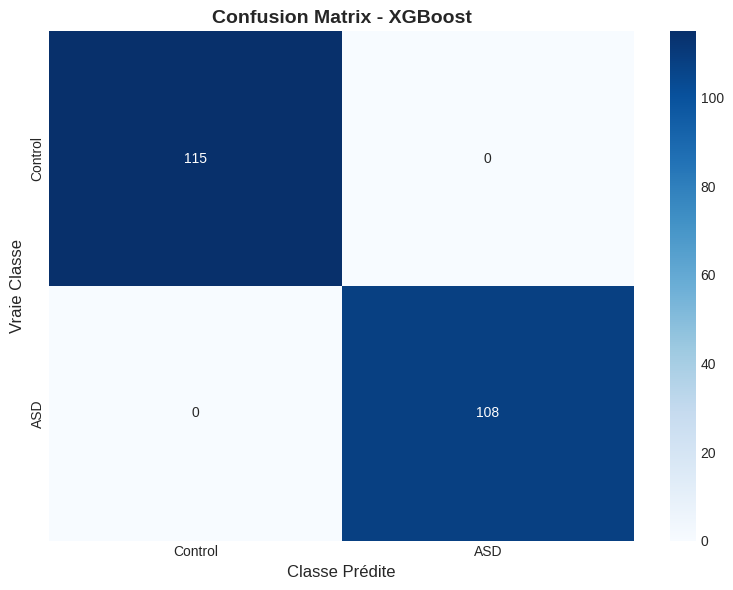


 Top 20 Features les plus importantes (XGBoost):
                                                                                                          Feature  Importance
                                                                                                 DX_GROUP_encoded         1.0
                                                                                     MEDICATION_NAME_Pantoprazole         0.0
                                                                                      MEDICATION_NAME_Mirtazapine         0.0
                                                                     MEDICATION_NAME_Methylphenidate; Risperidone         0.0
MEDICATION_NAME_Methylphenidate; Methylphenidate Extended Release; Risperidone; Dextroamphetamine and Amphetamine         0.0
                                                MEDICATION_NAME_Methylphenidate; Methylphenidate Extended Release         0.0
         MEDICATION_NAME_Methylphenidate; Guanfacine; Valproic Acid;

In [161]:
from xgboost import XGBClassifier
print("\n" + "="*100)
print("3.6 - XGBOOST")
print("="*100)

xgb = XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss', n_jobs=-1)
xgb.fit(X_train_scaled, y_train)

metrics_xgb, y_pred_xgb = evaluate_model(xgb, X_train_scaled, X_test_scaled,
                                         y_train, y_test, "XGBoost")

print(f"\n Résultats XGBoost:")
for key, value in metrics_xgb.items():
    if value is not None:
        print(f"  {key}: {value:.4f}" if isinstance(value, float) else f"  {key}: {value}")

# Confusion Matrix
cm_xgb = plot_confusion_matrix(y_test, y_pred_xgb, "Confusion Matrix - XGBoost")
plt.tight_layout()
plt.show()
# Feature Importance XGBoost
feature_importance_xgb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n Top 20 Features les plus importantes (XGBoost):")
print(feature_importance_xgb.head(20).to_string(index=False))




### COMPARAISON DES MODÈLES BASELINE


3.7 - COMPARAISON DES MODÈLES BASELINE

 TABLEAU COMPARATIF DES MODÈLES:
              Model  Train_Accuracy  Test_Accuracy  Precision   Recall  F1_Score      AUC
                KNN        0.935883       0.865471   0.933333 0.777778  0.848485 0.939372
Logistic Regression        1.000000       0.995516   1.000000 0.990741  0.995349 0.990821
      Decision Tree        1.000000       1.000000   1.000000 1.000000  1.000000 1.000000
      Random Forest        1.000000       0.995516   0.990826 1.000000  0.995392 1.000000
            XGBoost        1.000000       1.000000   1.000000 1.000000  1.000000 1.000000

✓ Résultats sauvegardés: results_baseline.csv


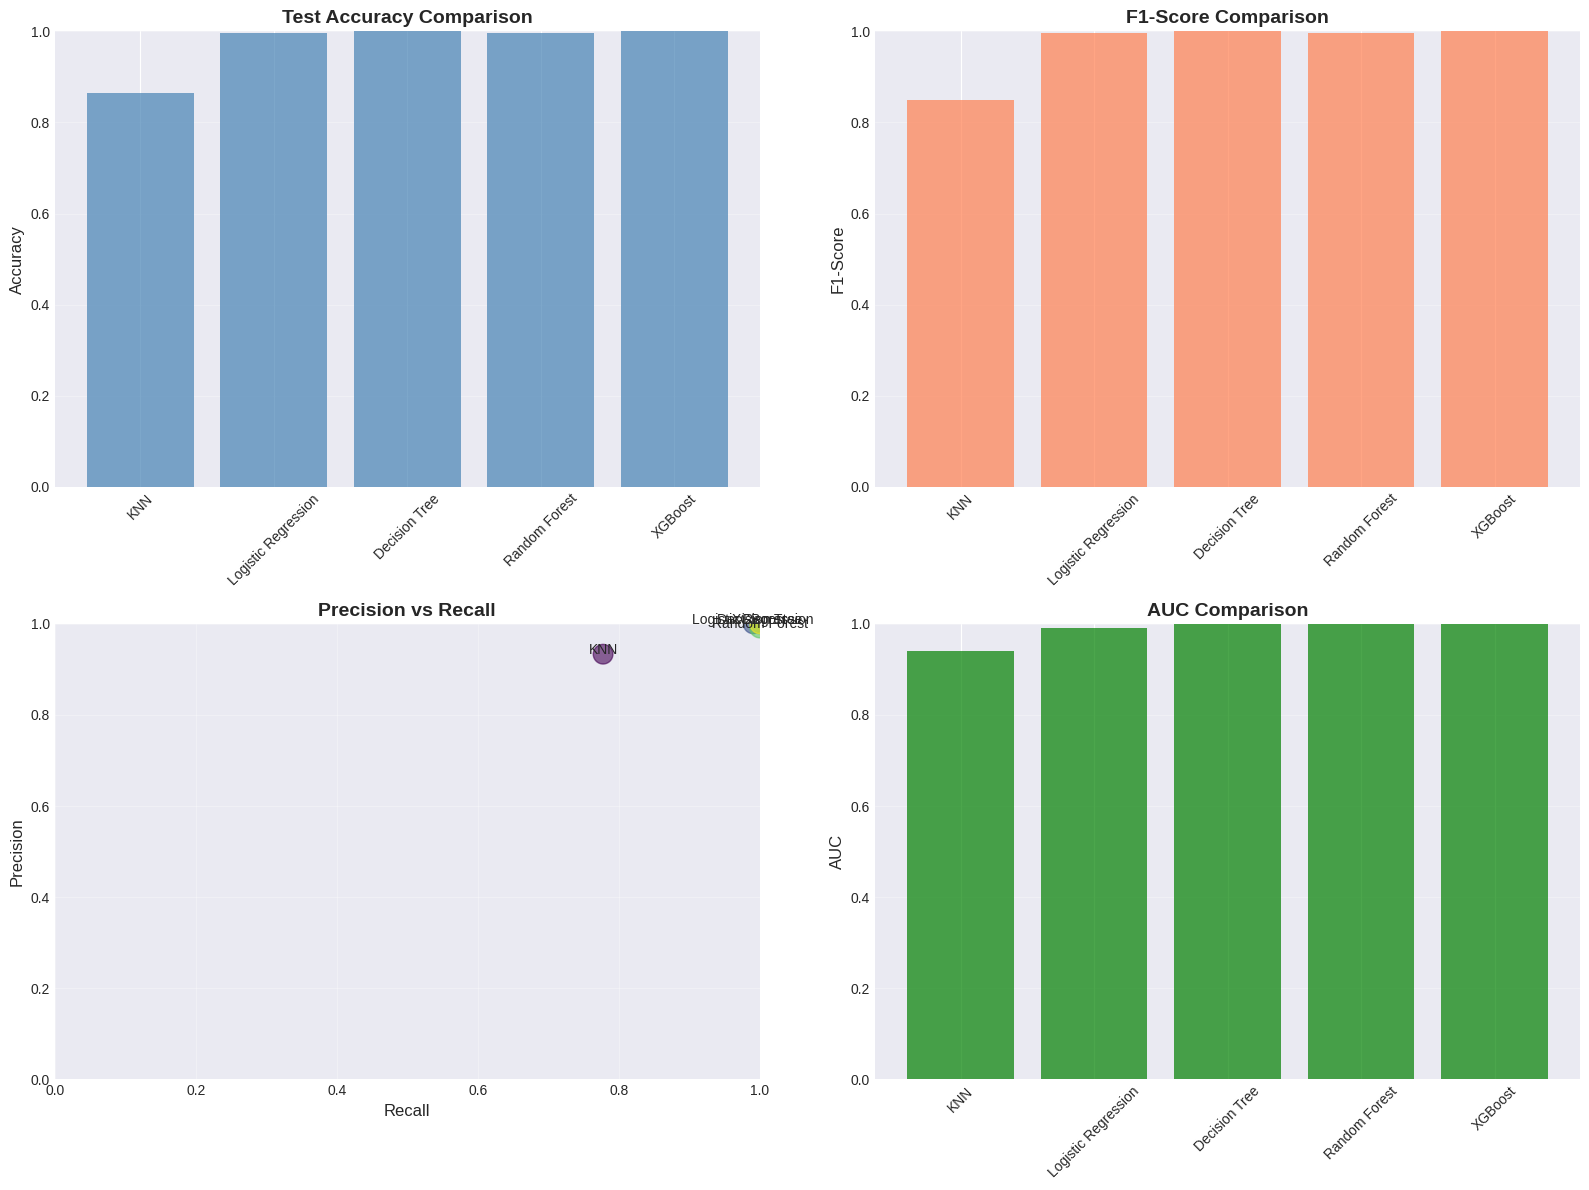


 MEILLEUR MODÈLE BASELINE:
  Modèle: Decision Tree
  Test Accuracy: 1.0000

 MODÈLES BASELINE ENTRAÎNÉS

 Modèles sauvegardés: models_baseline.pkl


In [162]:
# 3.7 COMPARAISON DES MODÈLES BASELINE

print("\n" + "="*100)
print("3.7 - COMPARAISON DES MODÈLES BASELINE")
print("="*100)

# Créer un DataFrame de comparaison
results_baseline = pd.DataFrame([
    metrics_knn,
    metrics_logreg,
    metrics_dt,
    metrics_rf,
    metrics_xgb
])

print("\n TABLEAU COMPARATIF DES MODÈLES:")
print(results_baseline.to_string(index=False))

# Sauvegarder
results_baseline.to_csv('results_baseline.csv', index=False)
print("\n Résultats sauvegardés: results_baseline.csv")

# Visualisation comparative
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Test Accuracy
axes[0, 0].bar(results_baseline['Model'], results_baseline['Test_Accuracy'], color='steelblue', alpha=0.7)
axes[0, 0].set_ylabel('Accuracy', fontsize=12)
axes[0, 0].set_title('Test Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].set_ylim([0, 1])

# F1-Score
axes[0, 1].bar(results_baseline['Model'], results_baseline['F1_Score'], color='coral', alpha=0.7)
axes[0, 1].set_ylabel('F1-Score', fontsize=12)
axes[0, 1].set_title('F1-Score Comparison', fontsize=14, fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)
axes[0, 1].set_ylim([0, 1])

# Precision vs Recall
axes[1, 0].scatter(results_baseline['Recall'], results_baseline['Precision'],
                   s=200, alpha=0.6, c=range(len(results_baseline)), cmap='viridis')
for i, model in enumerate(results_baseline['Model']):
    axes[1, 0].annotate(model,
                       (results_baseline['Recall'].iloc[i], results_baseline['Precision'].iloc[i]),
                       fontsize=10, ha='center')
axes[1, 0].set_xlabel('Recall', fontsize=12)
axes[1, 0].set_ylabel('Precision', fontsize=12)
axes[1, 0].set_title('Precision vs Recall', fontsize=14, fontweight='bold')
axes[1, 0].grid(alpha=0.3)
axes[1, 0].set_xlim([0, 1])
axes[1, 0].set_ylim([0, 1])

# AUC (si disponible)
auc_data = results_baseline[results_baseline['AUC'].notna()]
if len(auc_data) > 0:
    axes[1, 1].bar(auc_data['Model'], auc_data['AUC'], color='green', alpha=0.7)
    axes[1, 1].set_ylabel('AUC', fontsize=12)
    axes[1, 1].set_title('AUC Comparison', fontsize=14, fontweight='bold')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(axis='y', alpha=0.3)
    axes[1, 1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

# Identifier le meilleur modèle
best_model_idx = results_baseline['Test_Accuracy'].idxmax()
best_model_name = results_baseline.loc[best_model_idx, 'Model']
best_accuracy = results_baseline.loc[best_model_idx, 'Test_Accuracy']


print("\n" + "="*100)
print(" MODÈLES BASELINE ENTRAÎNÉS")
print("="*100)


### Cross-validation pour vérifier surapprentissage

In [167]:
from sklearn.model_selection import cross_val_score

for model_name, model in models_dict.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} - CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


KNN - CV Accuracy: 0.7661 ± 0.0318
Logistic Regression - CV Accuracy: 1.0000 ± 0.0000
Decision Tree - CV Accuracy: 1.0000 ± 0.0000
Random Forest - CV Accuracy: 1.0000 ± 0.0000
XGBoost - CV Accuracy: 1.0000 ± 0.0000


### Fine-tuning avec GridSearchCV

In [170]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

print("\n" + "="*100)
print("ÉTAPE FINE-TUNING DES MODÈLES")
print("="*100)

# Dictionnaire des modèles et paramètres à tuner
models_to_tune = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l2'],
            'solver': ['lbfgs', 'liblinear']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42, n_jobs=-1),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [5, 10, 15, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=42, n_jobs=-1, eval_metric='logloss'),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7, 9],
            'learning_rate': [0.01, 0.1, 0.3],
            'subsample': [0.8, 0.9, 1.0],
            'colsample_bytree': [0.8, 0.9, 1.0]
        }
    }
}

# Stockage des modèles tunés et résultats
tuned_models = {}
tuned_results = []

for model_name, config in models_to_tune.items():
    print(f"\n{'='*80}")
    print(f"FINE-TUNING: {model_name}")
    print(f"{'='*80}")

    # GridSearchCV
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train_scaled, y_train)

    # Afficher les meilleurs paramètres
    print(f"\nMeilleurs paramètres trouvés:")
    for param, value in grid_search.best_params_.items():
        print(f"  {param}: {value}")

    print(f"\nMeilleur score (F1) en validation croisée: {grid_search.best_score_:.4f}")

    # Stocker le meilleur modèle
    tuned_models[model_name] = grid_search.best_estimator_

    # Évaluation sur le test set
    metrics, y_pred = evaluate_model(
        grid_search.best_estimator_,
        X_train_scaled,
        X_test_scaled,
        y_train,
        y_test,
        model_name=f'{model_name} (Tuned)'
    )

    # Ajouter les meilleurs paramètres aux résultats
    metrics['Best_Params'] = grid_search.best_params_
    tuned_results.append(metrics)

# Transformer en DataFrame pour comparaison
tuned_results_df = pd.DataFrame(tuned_results)
print("\n📊 RÉSULTATS DES MODÈLES TUNÉS:")
print(tuned_results_df[['Model', 'Train_Accuracy', 'Test_Accuracy', 'F1_Score', 'AUC', 'Best_Params']])



ÉTAPE FINE-TUNING DES MODÈLES

FINE-TUNING: Logistic Regression
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Meilleurs paramètres trouvés:
  C: 0.1
  penalty: l2
  solver: lbfgs

Meilleur score (F1) en validation croisée: 1.0000

FINE-TUNING: Random Forest
Fitting 5 folds for each of 135 candidates, totalling 675 fits

Meilleurs paramètres trouvés:
  max_depth: 5
  min_samples_leaf: 1
  min_samples_split: 2
  n_estimators: 100

Meilleur score (F1) en validation croisée: 1.0000

FINE-TUNING: XGBoost
Fitting 5 folds for each of 324 candidates, totalling 1620 fits

Meilleurs paramètres trouvés:
  colsample_bytree: 0.8
  learning_rate: 0.01
  max_depth: 3
  n_estimators: 100
  subsample: 0.8

Meilleur score (F1) en validation croisée: 1.0000

📊 RÉSULTATS DES MODÈLES TUNÉS:
                         Model  Train_Accuracy  Test_Accuracy  F1_Score  \
0  Logistic Regression (Tuned)        1.000000       0.995516  0.995349   
1        Random Forest (Tuned)        0.992126      


COMPARAISON DES MODÈLES APRÈS FINE-TUNING
                             Train_Accuracy  Test_Accuracy  Precision    Recall  F1_Score       AUC                                                                                              Best_Params
Model                                                                                                                                                                                                       
Logistic Regression (Tuned)        1.000000       0.995516        1.0  0.990741  0.995349  0.990821                                                           {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Random Forest (Tuned)              0.992126       0.986547        1.0  0.972222  0.985915  0.999919                     {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
XGBoost (Tuned)                    1.000000       1.000000        1.0  1.000000  1.000000  1.000000  {'colsample_bytree': 0.8, 'learning_

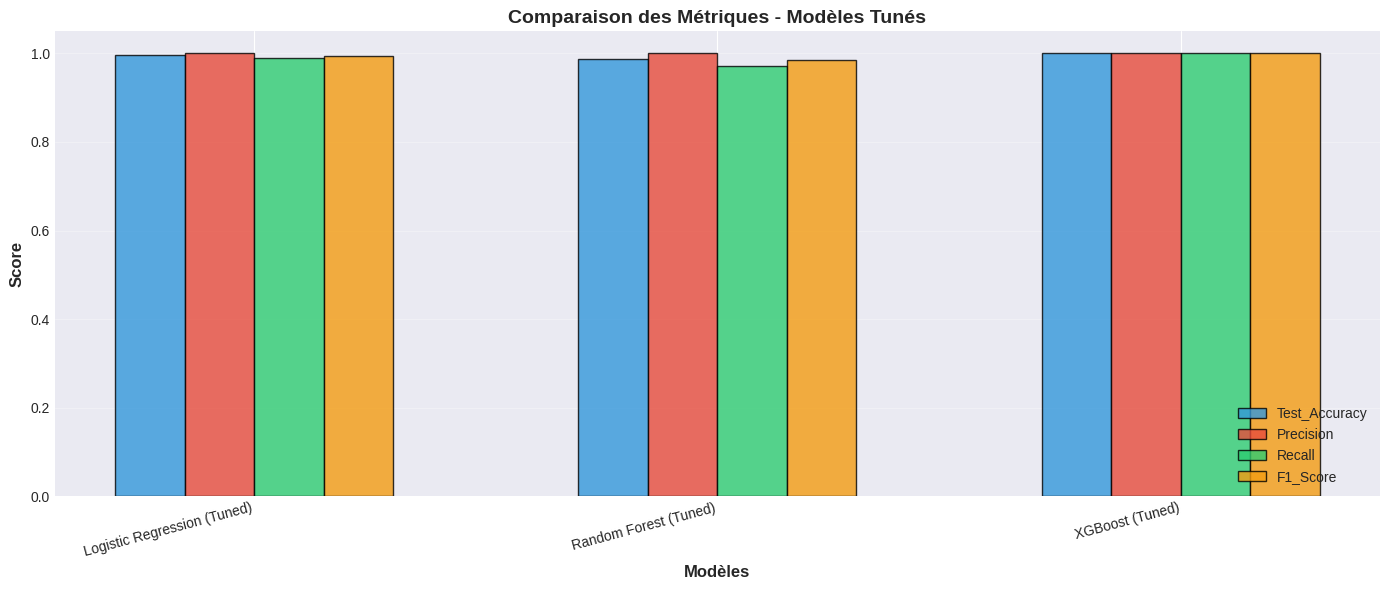

In [171]:
import numpy as np
import matplotlib.pyplot as plt

# Mettre les résultats tunés en DataFrame avec le nom du modèle comme index
tuned_comparison_df = tuned_results_df.set_index('Model')

print("\n" + "="*100)
print("COMPARAISON DES MODÈLES APRÈS FINE-TUNING")
print("="*100)
print(tuned_comparison_df.to_string())

# Visualisation comparative
fig, ax = plt.subplots(figsize=(14, 6))

x = np.arange(len(tuned_comparison_df))
width = 0.15

# Sélectionner les métriques que tu veux comparer
metrics = ['Test_Accuracy', 'Precision', 'Recall', 'F1_Score']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for i, (metric, color) in enumerate(zip(metrics, colors)):
    ax.bar(x + i*width, tuned_comparison_df[metric], width,
           label=metric, color=color, alpha=0.8, edgecolor='black')

ax.set_xlabel('Modèles', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Comparaison des Métriques - Modèles Tunés', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(tuned_comparison_df.index, rotation=15, ha='right')
ax.legend(loc='lower right', fontsize=10)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()
